Introduction
================
https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html

Linear Regression is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

**Simple regression**

Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions. x represents our input data and y represents our prediction.

y=mx+b

**Multivariable regression**

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

f(x,y,z)=w1x+w2y+w3z


Given our simple linear equation y=mx+b, we can calculate MSE as:

$ MSE = \frac{1}{N}\sum_{i=1}^{n}(y_{i}-(mx_{i}+b))^{2} $

We then aim to minismise this by varying the weights of the model such that the MSE is reduced, moving upwards the gradient of the cost function.

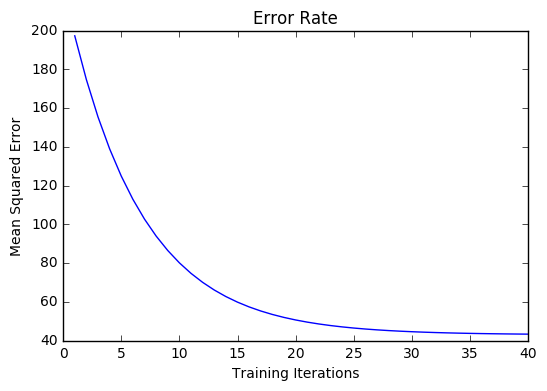


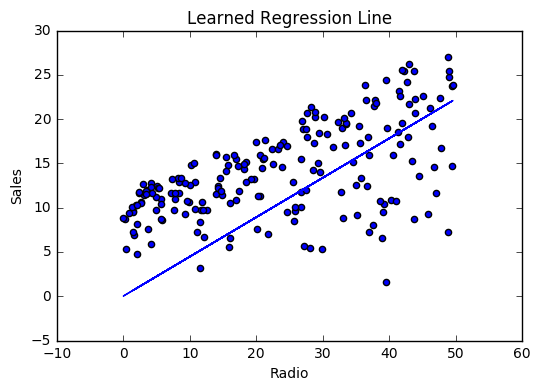

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import preprocessing_ml as pp

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr" # "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

#This is required to accept any changes to the module by forcing notebook to re-read the file 
#if any changes are made to the module while notebook is running
%load_ext autoreload
%autoreload 2


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import warnings
from sklearn.exceptions import DataConversionWarning,UndefinedMetricWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)


Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Logistic Regression + K-neighbours
-----------------

In [2]:
def log_regressor(X_train, y_train,r_state=0, v =0):
    '''Do linear regression fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - v (optional): boolean verbose
    - r_state (optional): random seed for logistic regression
    '''
    from sklearn.linear_model import LogisticRegression
    
    LR = LogisticRegression(random_state=r_state)
    LR = LR.fit(X_train, y_train) 
    
    if v == 1:
        print('Calculating logistic regressor......')
    
    return LR
    


In [3]:
def k_neighbors(X_train, y_train, v=0,  n_neighbors= 16):
    '''Do k_neighbors  fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - v (optional, default = 0): int (0 or 1) verbose
    - n_neighbors = 16: define number of neighbors 
    '''
    from sklearn.neighbors import KNeighborsClassifier
    
    KN = KNeighborsClassifier(n_neighbors=n_neighbors)
    KN.fit(X_train, y_train) 
    
    if v == 1:
        print('Calculating k-neighbours......')
        
    return KN



In [4]:
def support_vector_m(X_train, y_train, r_state=0,v=0,class_weight='balanced'):
    '''Do support vector mechanism fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    from sklearn.svm import SVC
    
    if v == 1:
        print('\nCalculating Support vector machine ..\n')
        
    SVM = SVC(C=1, kernel='linear', class_weight=class_weight, probability=True, random_state=r_state) # penalize,
    SVM.fit(X_train, y_train) 
    
    return SVM

Measures of success
---------------

In [5]:
def cross_val(model, X, Y, scoring = ['accuracy','precision','recall','f1'], cv=5):
   #See https://scikit-learn.org/stable/modules/model_evaluation.html for list of allowed scoring params 
    from sklearn.model_selection import cross_val_score 
    
    print('\nCrossvalidation score for {} splits:\n'.format(cv))   
    
    cv_results = pd.DataFrame(columns=scoring)
    for measure in scoring:
        cv_results[measure] = cross_val_score(model, X, Y, scoring = measure, cv=cv)
    
    #print("Cross validation Accuracy:\n", cv_results.mean(),"\nCross validation STDEV:\n" , cv_results.std())
    return cv_results.mean()

def performance(model,X_test,y_test,cutoff=0.5,v=0,output='Accuracy'):
    from sklearn.preprocessing import binarize
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

    if model == 'fram': # cheap and dirty fix for framingham data needing different processing
        y_pred = X_test > cutoff*100 
    else:
        y_pred = model.predict_proba(X_test)
        y_pred = binarize(y_pred,cutoff)[:,1]
    
    if v == 1: 
        print('\n========\nCuttoff: ',cutoff)
        print('Confusion Matrix:')
        cm=confusion_matrix(y_test,y_pred)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        print(confusion_matrix(y_test,y_pred))
    
        print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))
        print('f1 score: {:.2f}%'.format(f1_score(y_test,y_pred)*100))
        print('precision score: {:.2f}%'.format(precision_score(y_test,y_pred)*100))
        print('recall score: {:.2f}%'.format(recall_score(y_test,y_pred)*100))
        
        print(classification_report(y_test,y_pred))
    

    if output == 'Accuracy':
         return accuracy_score(y_test,y_pred)
    elif output == 'Precision':
         return precision_score(y_test,y_pred)
    elif output == 'Recall':
         return recall_score(y_test,y_pred)
    elif output == 'f1_score':
         return f1_score(y_test,y_pred)
    elif output == 'All':
        a = [accuracy_score(y_test,y_pred), precision_score(y_test,y_pred),
                      recall_score(y_test,y_pred), f1_score(y_test,y_pred)]
        return a



    
# measure = cross_val(k_neighbors(X_train, X_test, y_train, y_test), X_train, y_train,scoring=['accuracy'])

# measure
#where model_name is replaced by whatever you have defined the model fit as 
#For example in the K-neighbors section I have defined the model_name as KN. (see k_neighbors function)

Optimising
---------------

In [6]:
#Read in from pre-determined csv of framingham percentages and whether the patient actually got CHD.
df_fram = pd.read_csv("Framingham Score/fram_risk.csv",index_col="index")[['TenYearCHD','fram_percent']]
df_fram.head()


,TenYearCHD,fram_percent
index,,
0,0,0.905684
1,0,1.004992
2,0,16.647594
3,1,8.771542
4,0,8.621980


In [7]:
dataset = pd.read_csv('framingham.csv')

from statsmodels.tools import add_constant as add_constant
dataset_c = add_constant(dataset)
dataset_c.head()

# print(pp.chose_features(dataset_c, features=['TenYearCHD', 'const', 'sysBP', 'glucose' ,'age', 'totChol', ]))
# from imblearn.over_sampling import SMOTE

,const,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [334]:
# Finally use all the functions I made to investigate preprocessing of dataset:
# features = ['TenYearCHD','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
#             'diabetes', 'BPMeds','male', 'BMI', 'prevalentStroke',
#             'education', 'heartRate', 'currentSmoker'] # for reference

def t_features(dataset, f_algorithm, remove_missing='drop', scale = True, resample = 'none', 
               cutoff=0.5, metrics=['Accuracy','Precision','Recall','f1_score'], label='', v = 0):
    '''Investigate the effects n_features on a graph. Allows flexible graphing to investigate many variables.
    - dataset: DataFrame. The dataset to analyse.
    - f_algorithm: function pointer. A function that fits X_train and y_train
    - *remove_missing: How preprocessing should remove missing values. Options are:
                        - 'drop': uses preprocessing_ml.drop_missing to remove missing values, 
                        - 'impute_median': uses preprocessing_ml.impute_missing(strategy='median')
                        - 'impute_mean' which uses preprocessing_ml.impute_missing(strategy='mean')
    - *scale: Whether to scale data in preprocessing. If true uses preprocessing_ml.scale_data(). 
    - *resample: Whether to resample data. Options are:
                        - 'none': no resampling, 
                        - 'up': uses preprocessing_ml.upsample()
                        - 'down' which uses preprocessing_ml.downsample()
    - *cutoff: float in range(0,1). Cutoff by which a positive/negative result is predicted.
    - *metrics: list of strings from 'Accuracy','Precision','Recall','f1_score'. Score which to return
    - *label: string to append to legend entry
    - *v: 1 or 0, verbose
    '''
    
    features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
                'diabetes', 'BPMeds', 'male', 'BMI',
                'education', 'heartRate'] 

    #Investigate effect of no. features
    results_logreg = [] #Store results
    MIN_FEATURES = 3 #Min number of features to learn from
    for i in range(MIN_FEATURES,len(features)+1):
        
        dataset2 = pp.chose_features(dataset, features=features[:i]) # choose top n features
        
        # preprocess to remove missing values....
        if remove_missing == 'drop':
            dataset2 = pp.drop_missing(dataset2) # by dropping missing rows            
        elif remove_missing == 'impute_mean':
            dataset2 = pp.impute_missing(dataset2,strategy='mean') # by imputing missing rows with mean
        elif remove_missing == 'impute_median':
            dataset2 = pp.impute_missing(dataset2,strategy='median') # by imputing missing rows with median
        else:
            print('[ERROR] t_features: arg* remove_missing must be one of "drop", "impute_mean" or "impute_median"')
            return(-1)
        
        if scale == True: # preprocess to scale data
            dataset2 = pp.scale_data(dataset2)
        

        # preprocess resampling training set
        if resample == 'none':
            X_train, X_test, y_train, y_test = pp.split_data(dataset2) # split dataset 
        elif resample == 'up':
            train, test = pp.split_data(dataset2,split_dep_var=False)
            train = pp.upsample(train,v=0)
            X_train, y_train = pp.split_dep_var(train); X_test, y_test = pp.split_dep_var(test)
        elif resample == 'down':
            train, test = pp.split_data(dataset2,split_dep_var=False)
            train = pp.downsample(train,v=0)
            X_train, y_train = pp.split_dep_var(train); X_test, y_test = pp.split_dep_var(test)
        else:
            print('[ERROR] t_features: arg* resample must be one of "none", "up" or "down"')
            return(-1)

        algor = f_algorithm(X_train,y_train) # run ML fitting to training set

        results_logreg.append(performance(algor,X_test,y_test,output= 'All')) # append performance measure(s)


    results_logreg = pd.DataFrame(results_logreg,columns=['Accuracy','Precision','Recall','f1_score']) # create dataframe 
    results_logreg = results_logreg[metrics] # drop columns not selected by user

    for metric in results_logreg.columns: # plot metrics and print max vals
        plt.plot(range(3,i+1), results_logreg[metric],label="{} {}".format(metric,label),marker='o')
        if v == 1:
            print(metric, "max={:.4f} at N_features = {}".format(max(results_logreg[metric]),
                                                                 results_logreg[metric].idxmax()+MIN_FEATURES))
    if v == 1:
        print('')

    #basic graph formatting
    plt.grid(True)
    plt.xlabel('Number of features')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1, 0.9))

# algor_name = str(f_algorithm).split(' ')[1] # get name of function from 


In [335]:
def t_cutoff(dataset, f_algorithm, remove_outliers = False, remove_missing='drop', scale = None, resample = 'none', 
               n_features=len(dataset.columns),metrics=['Accuracy','Precision','Recall','f1_score'], 
                 label='',x_max=0.5, op= 'f1_score', v = 0):
    '''Investigate the effects cutoff on a graph. Allows flexible graphing to investigate many variables.
    - dataset: DataFrame. The dataset to analyse.
    - f_algorithm: function pointer. A function that fits X_train and y_train
    - *remove_outliers: Whether or not to remove outliers. True or False
    - *remove_missing: How preprocessing should remove missing values. Options are:
                        - 'drop': uses preprocessing_ml.drop_missing to remove missing values, 
                        - 'impute_median': uses preprocessing_ml.impute_missing(strategy='median')
                        - 'impute_mean' which uses preprocessing_ml.impute_missing(strategy='mean')
    - *scale: Whether to scale data in preprocessing. If true uses preprocessing_ml.scale_data(). 
                        - 'standard': standard scalar, 
                        - 'minmax': mimax scalar
    - *resample: Whether to resample data. Options are:
                        - 'none': no resampling, 
                        - 'smote': resample with smote function, 
                        - 'up': uses preprocessing_ml.upsample()
                        - 'down' which uses preprocessing_ml.downsample()
    - *n_features: int in range(1,16). How many features to use (default is all features).
    - *metrics: list of strings from 'Accuracy','Precision','Recall','f1_score'. Score which to return
    - *label: string to append to legend entry
    - *x_max: max cutoff to test up to
    - *op: optimisation parameter. Print optimised value and metric. Choose from 'Accuracy','Precision','Recall','f1_score'
    - *v: 1 or 0, verbose
    '''
    
    N_POINTS = 100
    RANGE_X = np.arange(0, x_max, x_max/N_POINTS) # range of cutoffs to test

    features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
                'diabetes', 'BPMeds', 'male', 'BMI',
                'education', 'heartRate'] 

    dataset_t = pp.chose_features(dataset, features=features[:n_features]) # choose n features
    if remove_outliers == True:
        dataset_t = pp.outliers(dataset_t,v=v)
    
    # preprocess to remove missing values....
    if remove_missing == 'drop':
        dataset2 = pp.drop_missing(dataset_t) # by dropping missing rows            
    elif remove_missing == 'impute_mean':
        dataset2 = pp.impute_missing(dataset_t,strategy='mean') # by imputing missing rows with mean
    elif remove_missing == 'impute_median':
        dataset2 = pp.impute_missing(dataset_t,strategy='median') # by imputing missing rows with median
    else:
        print('[ERROR] t_features: arg* remove_missing must be one of "drop", "impute_mean" or "impute_median"')
        return(-1)
        
    if scale == 'standard': # preprocess to scale data
        dataset2 = pp.scale_data(dataset2, 'standard')
    elif scale == 'minmax': # preprocess to scale data
        dataset2 = pp.scale_data(dataset2, 'minmax')
        
    # preprocess resampling training set
    if resample == 'none':
        X_train, X_test, y_train, y_test = pp.split_data(dataset2,r_state=0) # split dataset 
    elif resample == 'smote':
        X_train, X_test, y_train, y_test =  pp.smote(dataset2,r_state=0) # split dataset 
    elif resample == 'up':
        train, test = pp.split_data(dataset2,split_dep_var=False,r_state=0)
        train = pp.upsample(train,v=0,ratio_1_to_0=0.6)
        X_train, y_train = pp.split_dep_var(train); X_test, y_test = pp.split_dep_var(test)
    elif resample == 'down':
        train, test = pp.split_data(dataset2,split_dep_var=False,r_state=0)
        train = pp.downsample(train,v=0,ratio_1_to_0=0.6)
        X_train, y_train = pp.split_dep_var(train); X_test, y_test = pp.split_dep_var(test)
    else:
        print('[ERROR] t_features: arg* resample must be one of "none", "smote", "up" or "down"')
        return(-1)

    ML = f_algorithm(X_train, y_train) # train ML

    for metric in metrics: # for each metric 
        results = []
        for cutoff in RANGE_X: # find cutoff performance
            results.append([cutoff,performance(ML,X_test,y_test,cutoff=cutoff,output=metric)])
        results = pd.DataFrame(results,columns=['cutoff','value'])
        plt.plot(results['cutoff'], results['value'],label="{} {}".format(metric,label),marker='o')
        
        if v == 1:
            if metric == op:
                optimal_cut = results['cutoff'].iloc[results['value'].idxmax()]
                print("Optimising {}. Max at cutoff = {:.4f}".format(metric, optimal_cut))
                plt.axvline(x=optimal_cut,linewidth=1, color='k',linestyle='--')
                for metric_2 in ['Accuracy','Precision','Recall','f1_score']:
                    print("{} = {:.4f}".format(metric_2,performance(ML,X_test,y_test,cutoff=optimal_cut
                                                                                ,output=metric_2)))

#             [cutoff,performance(ML,X_test,y_test,cutoff=cutoff,output=metric)]

    if v == 1:
        print('') 
        
            
    plt.grid(True)
    plt.xlabel('Cutoff')
    plt.xlim(RANGE_X.min(),RANGE_X.max())
    plt.ylabel('score')
    plt.legend(bbox_to_anchor=(1, 0.9))

def t_cutoff_fram(df_fram, metrics=['Accuracy','Precision','Recall','f1_score'], label='', x_max=0.5, op = 'f1_score'):
    '''Investigate the effects cutoff on a graph for framingham algorithm
    '''
    N_POINTS = 100
    RANGE_X = np.arange(0, x_max, x_max/N_POINTS) # range of cutoffs to test

    for metric in metrics: # for each metric 
        results = []
        for cutoff in RANGE_X: # for each cutoff
            results.append([cutoff,performance('fram',df_fram['fram_percent'],df_fram['TenYearCHD'],cutoff=cutoff,
                                               output=metric)])
            
        results = pd.DataFrame(results,columns=['cutoff','value'])
        plt.plot(results['cutoff'], results['value'],label="{} {}".format(metric,label),marker='o')
        
        if metric == op:
            optimal_cut = results['cutoff'].iloc[results['value'].idxmax()]
            print("Optimising {}. Max at cutoff = {:.4f}".format(metric, optimal_cut))
            plt.axvline(x=optimal_cut,linewidth=1, color='k',linestyle='--')
            for metric_2 in ['Accuracy','Precision','Recall','f1_score']:
                print("{} = {:.4f}".format(metric_2,performance('fram',df_fram['fram_percent'],df_fram['TenYearCHD'],
                                                                cutoff=optimal_cut,output=metric_2)))
    plt.grid(True)
    plt.xlabel('Cutoff')
    plt.xlim(RANGE_X.min(),RANGE_X.max())
    plt.ylabel('score')
    plt.legend(bbox_to_anchor=(1, 0.9))

    
    
#     plt.plot(RANGE_X, results,label="{} {}".format(metric,label),marker='o')
# #         print(metric, "max = {:.4f} at cutoff = {}".format(results,
# #                                                            RANGE_X[results.index(max(results))]))
#     plt.grid(True)

The following is the test cell for optimisation. Uncomment tests and try running them

 Logistic Regression 



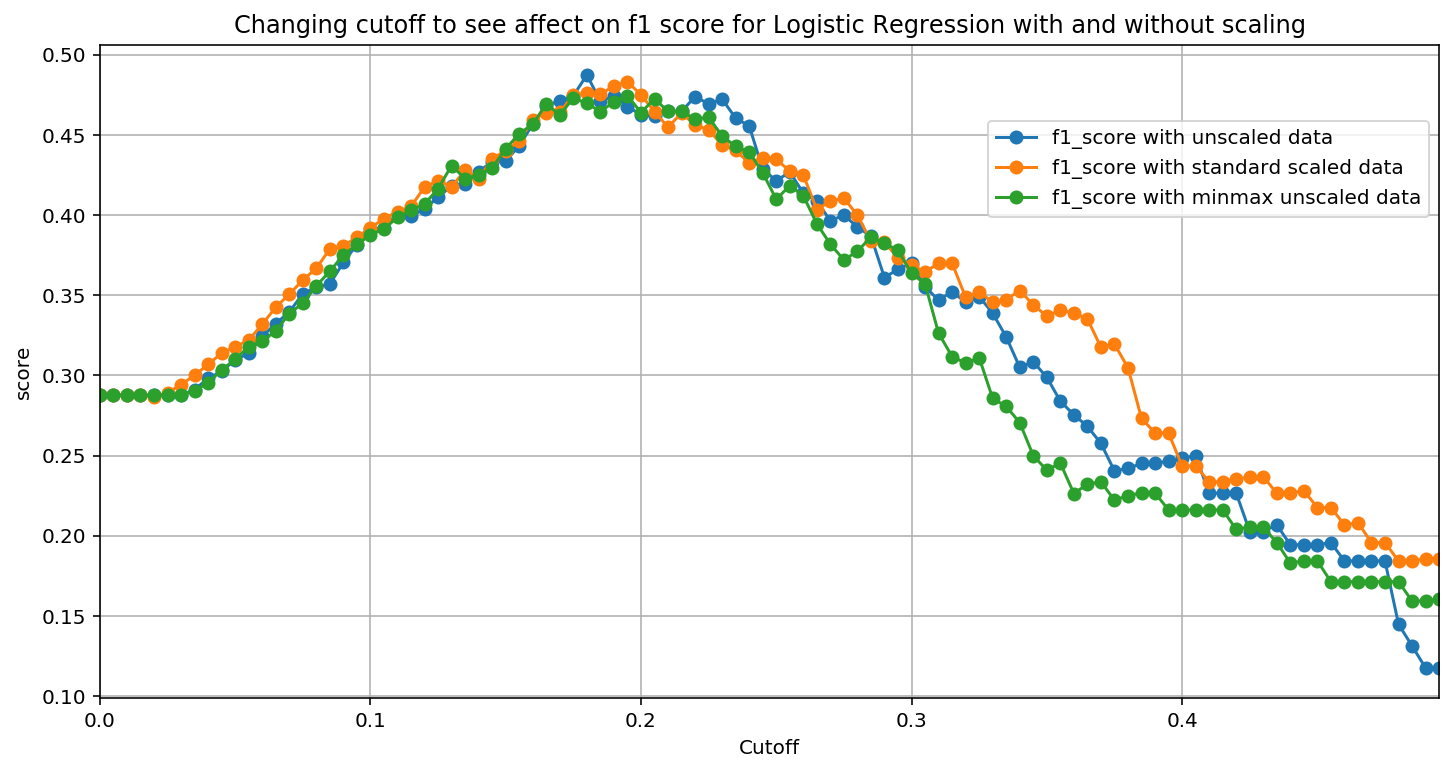

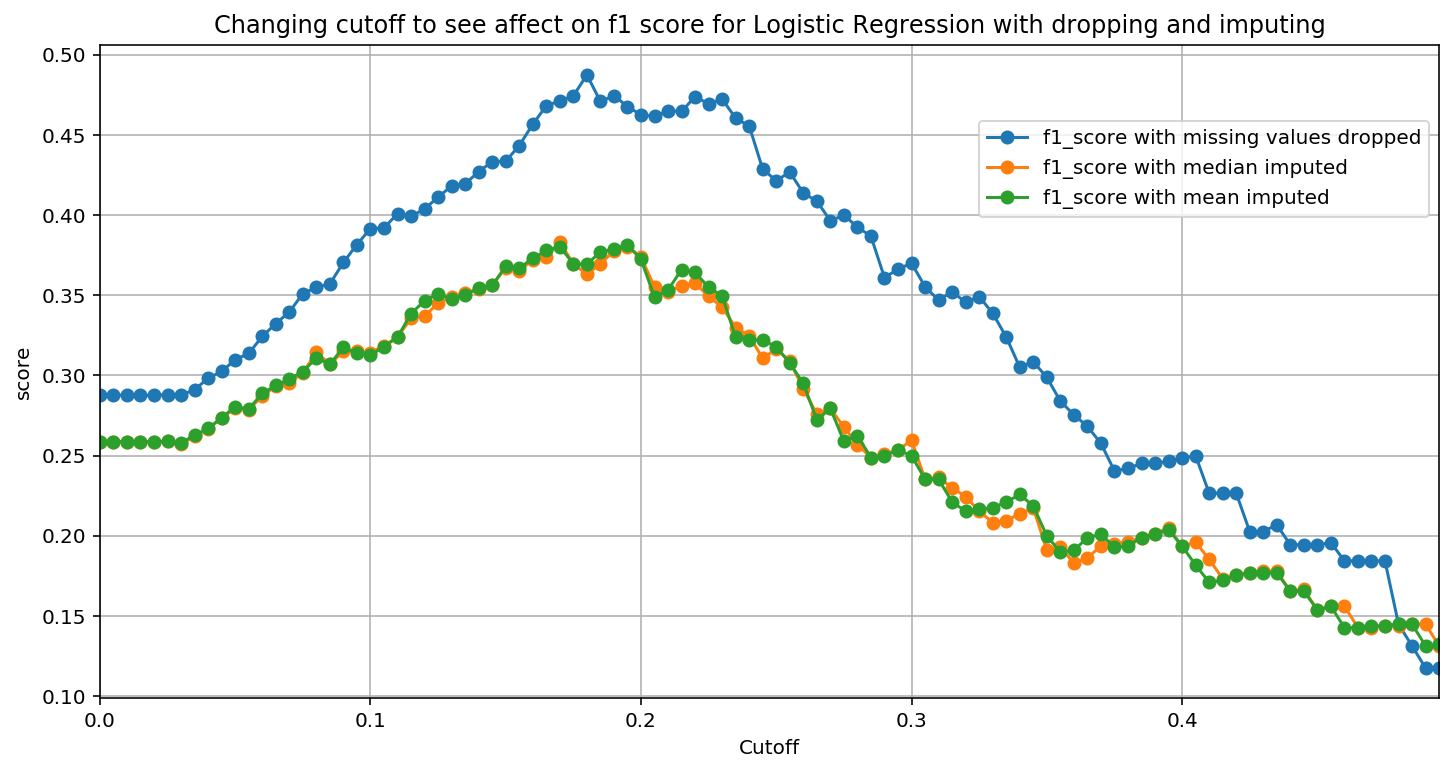

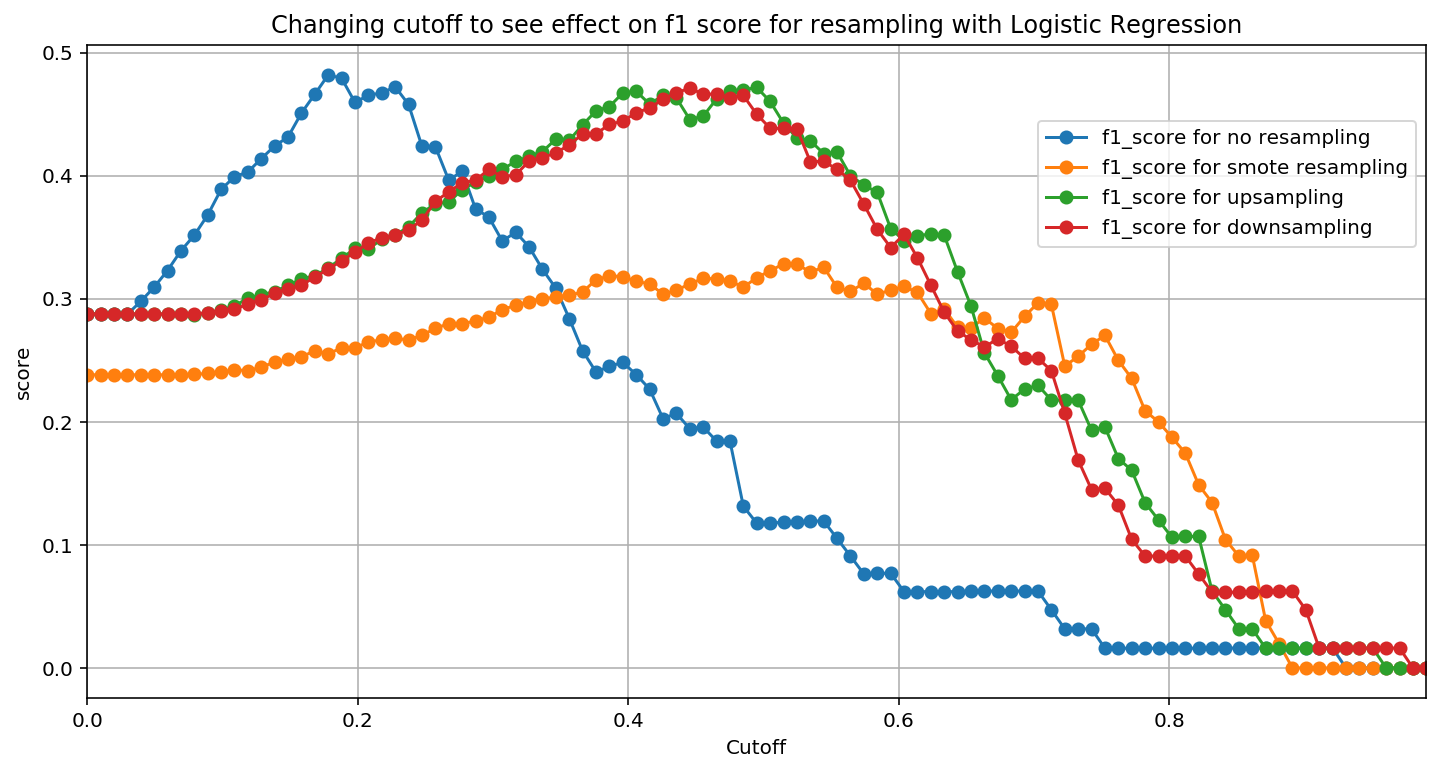

In [336]:
# Create a dictionary for the algorithms tested and run tests

algorithms = {
  "Logistic Regression": log_regressor,
  "K Neighbours": k_neighbors,
  "Support Vector Machine": support_vector_m
}

algorithms_to_test=["Logistic Regression"] # test specific algorithm(s)
# algorithms_to_test = algorithms.keys() # test all

for a in algorithms_to_test:
    print ("====================\n",a,"\n")
    
    ########################################
    ####    Plotting over n features    ####
    ########################################

#     plt.figure(figsize=(12, 6))
#     plt.title('Changing number of features to see affect on performance scores for {}'.format(a))
#     t_features(dataset_c,algorithms[a],metrics=['f1_score'])

#     plt.figure(figsize=(12, 6))
#     plt.title('Changing number of features to see affect on f1 score for {} with and without scaling'.format(a))
#     t_features(dataset_c,algorithms[a],scale=True, metrics=['f1_score'], label='with scaled data')
#     t_features(dataset_c,algorithms[a],scale=False, metrics=['f1_score'], label='with unscaled data')
    
#     plt.figure(figsize=(12, 6))
#     plt.title('Changing number of features to see affect on f1 score for {} with dropping and imputing'.format(a))
#     t_features(dataset_c,algorithms[a], remove_missing = 'drop', metrics=['f1_score'], label='with missing values dropped')
#     t_features(dataset_c,algorithms[a], remove_missing = 'impute_median', metrics=['f1_score'], label='with median imputed')
#     t_features(dataset_c,algorithms[a], remove_missing = 'impute_mean', metrics=['f1_score'], label='with mean imputed')

#     plt.figure(figsize=(12, 6))
#     plt.title('Changing number of features to see effect on f1 score for resampling with {}'.format(a))
#     t_features(dataset_c, algorithms[a], resample = 'down',metrics=['f1_score'],label='for upsampling')
#     t_features(dataset_c, algorithms[a], resample = 'up',metrics=['f1_score'],label='for downsampling')
#     t_features(dataset_c, algorithms[a], resample = 'none',metrics=['f1_score'],label='for no resampling')

    ########################################
    ####    Plotting over thresholds    ####
    ########################################

#     plt.figure(figsize=(12, 6))
#     plt.title('Changing cutoff to see affect on performance scores for {}'.format(a))
#     t_cutoff(dataset_c,algorithms[a])
    
#     plt.figure(figsize=(12, 6))
#     plt.title('Changing cutoff to see affect on f1 score for {} with and without removing outliers'.format(a))
#     t_cutoff(dataset_c,algorithms[a],remove_outliers=True, metrics=['f1_score'], label='with outliers removed')
#     t_cutoff(dataset_c,algorithms[a],remove_outliers=False, metrics=['f1_score'], label='without outliers removed')

    plt.figure(figsize=(12, 6))
    plt.title('Changing cutoff to see affect on f1 score for {} with and without scaling'.format(a))
    t_cutoff(dataset_c,algorithms[a],scale='none', metrics=['f1_score'], label='with unscaled data')
    t_cutoff(dataset_c,algorithms[a],scale='standard', metrics=['f1_score'], label='with standard scaled data')
    t_cutoff(dataset_c,algorithms[a],scale='minmax', metrics=['f1_score'], label='with minmax unscaled data')

    plt.figure(figsize=(12, 6))
    plt.title('Changing cutoff to see affect on f1 score for {} with dropping and imputing'.format(a))
    t_cutoff(dataset_c,algorithms[a], remove_missing = 'drop', metrics=['f1_score'], label='with missing values dropped')
    t_cutoff(dataset_c,algorithms[a], remove_missing = 'impute_median', metrics=['f1_score'], label='with median imputed')
    t_cutoff(dataset_c,algorithms[a], remove_missing = 'impute_mean', metrics=['f1_score'], label='with mean imputed')

    plt.figure(figsize=(12, 6))
    plt.title('Changing cutoff to see effect on f1 score for resampling with {}'.format(a))
    t_cutoff(dataset_c, algorithms[a], resample = 'none',metrics=['f1_score'],label='for no resampling',x_max=0.99)
    t_cutoff(dataset_c, algorithms[a], resample = 'smote',metrics=['f1_score'],label='for smote resampling',x_max=0.99)
    t_cutoff(dataset_c, algorithms[a], resample = 'up',metrics=['f1_score'],label='for upsampling',x_max=0.99)
    t_cutoff(dataset_c, algorithms[a], resample = 'down',metrics=['f1_score'],label='for downsampling',x_max=0.99)
    



Optimising f1_score. Max at cutoff = 0.1840
Accuracy = 0.7568
Precision = 0.3778
Recall = 0.6911
f1_score = 0.4885

Optimising f1_score. Max at cutoff = 0.0800
Accuracy = 0.6506
Precision = 0.2445
Recall = 0.6194
f1_score = 0.3506


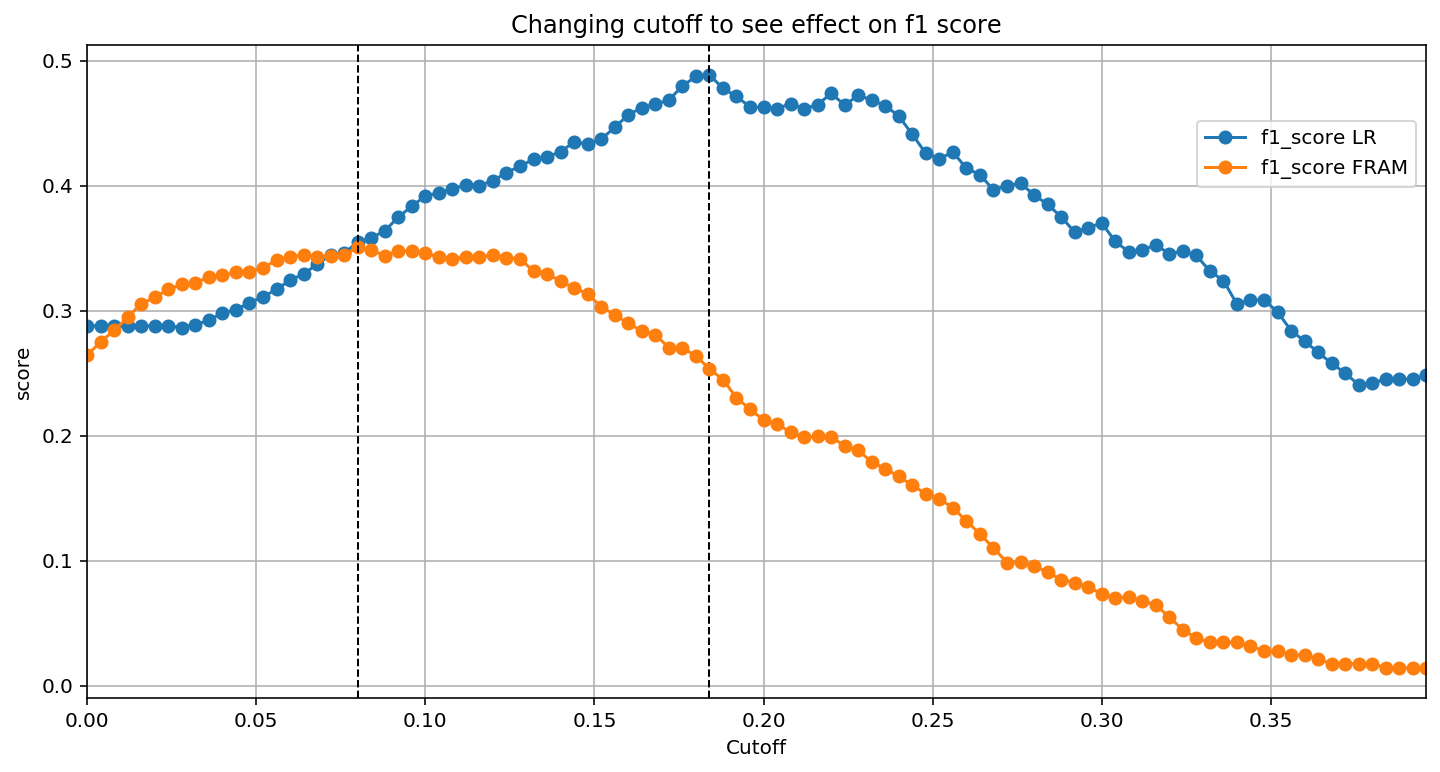

In [337]:
   
plt.figure(figsize=(12, 6))
plt.title('Changing cutoff to see effect on f1 score'.format(a))
t_cutoff(dataset_c, algorithms["Logistic Regression"], scale=None, remove_missing = 'drop',
         resample = 'none',metrics=['f1_score'],x_max=0.4,v=1,op='f1_score',label='LR')

t_cutoff_fram(df_fram,metrics=['f1_score'],label='FRAM',x_max=0.4,op='f1_score')



In [338]:
#histogram of freq of each % chance predicted by model. Shows the distribution of what the model predicts.

def t_plot_hist(y_pred,label,n_bins=20,fit=None):
    '''Plot distribution of a set of probabilities.
    - dataset: y_pred. List of predicted %.
    - *n_bins: number of bins in histogram
    - *fit: Apply a distribution fit to data. Options are 'norm' for normal dist, 'skew' for skewed normal 
                                                or 'exp' for exponential fit
    '''
    from scipy.stats import norm, expon, skewnorm
    
    n, bins, patches = plt.hist(y_pred, bins = n_bins,alpha=0.5,label=label,density=1)
    
    if fit == 'norm':
        mu, sigma = norm.fit(y_pred)
        plt.plot(bins, norm.pdf(bins, mu, sigma), 'r--', linewidth=2, label='normal fit')
        plt.axvline(x=mu,linewidth=1, color='k',linestyle='--',label=r'$\sigma = {}$'.format(round(mu,3))) #adds thick red line @ y=0
    
    if fit == 'exp':
        plt.plot(bins, expon.pdf(bins, *expon.fit(y_pred)), 'r--', linewidth=2, label='exp fit')
    
    if fit == 'skew':
        plt.plot(bins, skewnorm.pdf(bins, *skewnorm.fit(y_pred)), 'r--', linewidth=2, label='skewnorm fit')

    plt.xlabel('CHD %')
    plt.ylabel('Freq Density')
    plt.xlim(left=0.0, right=1)
    plt.legend()


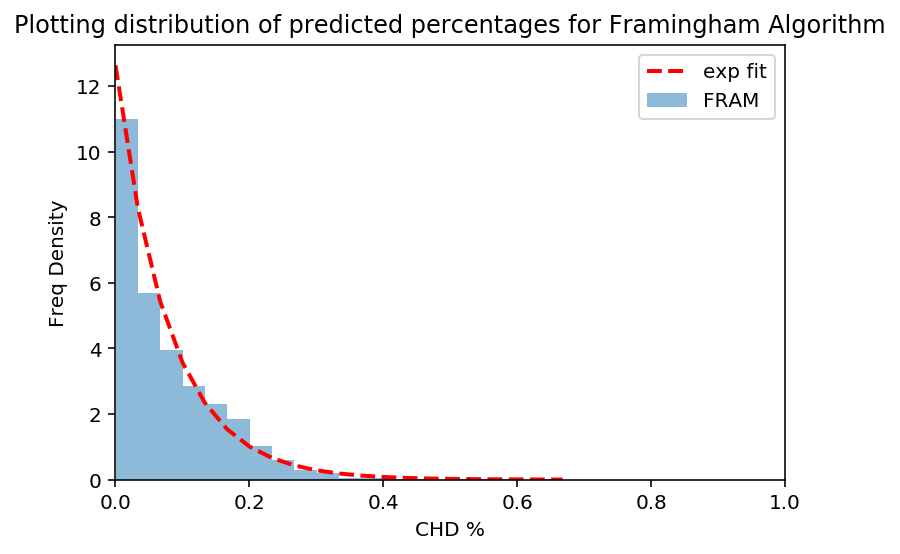

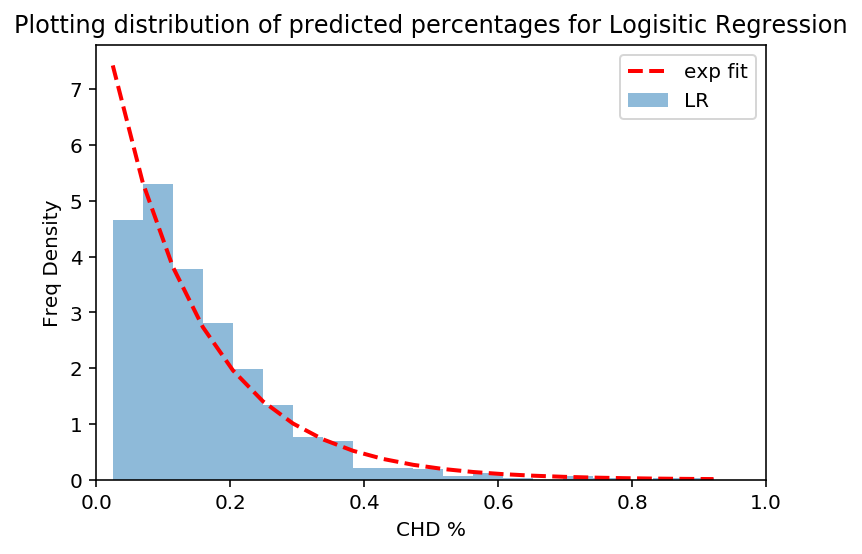

In [339]:
########################## Test conditions
dataset_t = pp.chose_features(dataset_c, features=features)
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
# dataset_t = pp.scale_data(dataset_t)
##########################

#No resampling
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset 

plt.figure()
plt.title('Plotting distribution of predicted percentages for Framingham Algorithm')
y_pred = df_fram['fram_percent'].values/100
t_plot_hist(y_pred,label='FRAM',fit='exp')

plt.figure()
plt.title('Plotting distribution of predicted percentages for Logisitic Regression')
y_pred = log_regressor(X_train, y_train).predict_proba(X_test)
t_plot_hist(y_pred[:,1],label='LR', fit = 'exp')

# plt.figure()
# plt.title('Plotting distribution of predicted percentages for K Neighbours')
# y_pred = k_neighbors(X_train, y_train).predict_proba(X_test)
# t_plot_hist(y_pred[:,1],label='KN')

# plt.figure()
# plt.title('Plotting distribution of predicted percentages for SVM')
# y_pred = support_vector_m(X_train, y_train).predict_proba(X_test)
# t_plot_hist(y_pred[:,1],label='SVM')

#with resampling

# train, test = pp.split_data(dataset_t,split_dep_var=False)
# train = pp.upsample(train,v=0)
# X_train, y_train = pp.split_dep_var(train); X_test, y_test = pp.split_dep_var(test)

# plt.figure()
# plt.title('Plotting distribution of predicted percentages for LR with upsampling')
# y_pred = log_regressor(X_train, y_train).predict_proba(X_test)
# t_plot_hist(y_pred[:,1],label='LR',fit = 'norm')


In [347]:
def t_overfit(dataset, f_algorithm, remove_outliers = False, remove_missing='drop', scale = None, resample = 'none', 
               n_features=len(dataset.columns),metrics=['Accuracy','Precision','Recall','f1_score'], 
                 label='',x_max=0.5, op= 'f1_score', v = 0):
    '''Investigate the effects cutoff on a graph. Allows flexible graphing to investigate many variables.
    - dataset: DataFrame. The dataset to analyse.
    - f_algorithm: function pointer. A function that fits X_train and y_train
    - *remove_outliers: Whether or not to remove outliers. True or False
    - *remove_missing: How preprocessing should remove missing values. Options are:
                        - 'drop': uses preprocessing_ml.drop_missing to remove missing values, 
                        - 'impute_median': uses preprocessing_ml.impute_missing(strategy='median')
                        - 'impute_mean' which uses preprocessing_ml.impute_missing(strategy='mean')
    - *scale: Whether to scale data in preprocessing. If true uses preprocessing_ml.scale_data(). 
                        - 'standard': standard scalar, 
                        - 'minmax': mimax scalar
    - *resample: Whether to resample data. Options are:
                        - 'none': no resampling, 
                        - 'smote': resample with smote function, 
                        - 'up': uses preprocessing_ml.upsample()
                        - 'down' which uses preprocessing_ml.downsample()
    - *n_features: int in range(1,16). How many features to use (default is all features).
    - *metrics: list of strings from 'Accuracy','Precision','Recall','f1_score'. Score which to return
    - *label: string to append to legend entry
    - *x_max: max cutoff to test up to
    - *op: optimisation parameter. Print optimised value and metric. Choose from 'Accuracy','Precision','Recall','f1_score'
    - *v: 1 or 0, verbose
    '''
    
    N_POINTS = 30
    RANGE_X = np.arange(0, x_max, x_max/N_POINTS) # range of cutoffs to test
    
    
    coeff= [] # the final model coeffs
    icept = [] # the final model intercept

    features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
                'diabetes', 'BPMeds', 'male', 'BMI',
                'education', 'heartRate'] 

    dataset_t = pp.chose_features(dataset, features=features[:n_features]) # choose n features
    if remove_outliers == True:
        dataset_t = pp.outliers(dataset_t,v=v)
    
    # preprocess to remove missing values....
    if remove_missing == 'drop':
        dataset2 = pp.drop_missing(dataset_t) # by dropping missing rows            
    elif remove_missing == 'impute_mean':
        dataset2 = pp.impute_missing(dataset_t,strategy='mean') # by imputing missing rows with mean
    elif remove_missing == 'impute_median':
        dataset2 = pp.impute_missing(dataset_t,strategy='median') # by imputing missing rows with median
    else:
        print('[ERROR] t_features: arg* remove_missing must be one of "drop", "impute_mean" or "impute_median"')
        return(-1)
        
    if scale == 'standard': # preprocess to scale data
        dataset2 = pp.scale_data(dataset2, 'standard')
    elif scale == 'minmax': # preprocess to scale data
        dataset2 = pp.scale_data(dataset2, 'minmax')

    average_array_train = pd.DataFrame() # performace when testing using training set
    average_array_test = pd.DataFrame() # performace when testing using unadulterated test set

    for state in range(0,n_states):
        if v == 1:
            print(round(state/n_states*100,2),"%, ",end='') # progress bar (kind of)

            # preprocess resampling training set
        if resample == 'none':
            X_train, X_test, y_train, y_test = pp.split_data(dataset2,r_state=state) # split dataset 
        elif resample == 'smote':
            X_train, X_test, y_train, y_test =  pp.smote(dataset2,r_state=state) # split dataset 
        elif resample == 'up':
            train, test = pp.split_data(dataset2,split_dep_var=False,r_state=state)
            train = pp.upsample(train,v=0,ratio_1_to_0=0.6)
            X_train, y_train = pp.split_dep_var(train); X_test, y_test = pp.split_dep_var(test)
        elif resample == 'down':
            train, test = pp.split_data(dataset2,split_dep_var=False,r_state=state)
            train = pp.downsample(train,v=0,ratio_1_to_0=0.6)
            X_train, y_train = pp.split_dep_var(train); X_test, y_test = pp.split_dep_var(test)
        else:
            print('[ERROR] t_features: arg* resample must be one of "none", "smote", "up" or "down"')
            return(-1)

        ML = f_algorithm(X_train, y_train) # train ML calculate ML fit

        coeff.append(ML.coef_[0]) # append model coeffs to array
        icept.append(ML.intercept_[0])

        results_train = []
        results_test = []

        for cutoff in RANGE_X:
            results_test.append(performance(ML,X_test,y_test,cutoff=cutoff,output=param)) # test model against test set
            results_train.append(performance(ML,X_train,y_train,cutoff=cutoff,output=param)) # test model against training set

        average_array_train[state] = results_train
        average_array_test[state] = results_test


    # averages for performance over n random states for splitting
    average_array_test['average'] = average_array_test.mean(axis = 1) 
    average_array_test['std'] = average_array_test.std(axis = 1) 
    average_array_train['average'] = average_array_train.mean(axis = 1) 
    average_array_train['std'] = average_array_train.std(axis = 1) 
    
    max_val_test = average_array_test['average'].max()
    max_val_cut = RANGE_X[average_array_test['average'].idxmax()]
    
    
    if v == 1:
        print("\nMAX AV TEST: {:.3f}".format(average_array_test['average'].max()))
        print("CUTOFF MAX AV TEST: {:.3f}".format(RANGE_X[average_array_test['average'].idxmax()]))

        print("\nMAX AV TRAIN: {:.3f}".format(average_array_train['average'].max()))
        print("CUTOFF MAX AV TRAIN: {:.3f}".format(RANGE_X[average_array_train['average'].idxmax()]))

        #plot fig of overfitting curves
        plt.figure(figsize=(12, 6))
        plt.errorbar(RANGE_X, average_array_test['average'],yerr=average_array_test['std'],label='Test set',marker='o')
        plt.errorbar(RANGE_X, average_array_train['average'],yerr=average_array_train['std'],label='Training set',marker='o')

        plt.grid(True)
        plt.title('Changing cutoff to see effect for LR, averaged over {} random states'.format(n_states))
        plt.xlabel('Cutoff')
        plt.ylabel(param)
        plt.legend()

        ######################
        coeff = pd.DataFrame(coeff,columns=features[1:])
        icept = pd.DataFrame(icept,columns=['const'])

        ### slightly dodgy (but working) way to convert averages of coeffs to dataframe for ease of graphing
        LR_av_coeffs=pd.DataFrame(coeff.mean(),columns=['mean']).join(pd.DataFrame(coeff.std(),columns=['std'])).sort_values(by='mean',ascending=False)
        LR_av_coeffs= LR_av_coeffs.drop('const')

        # plot second figure with varience in params for LR model over n random states 
        plt.figure(figsize=(10,8))
        plt.errorbar(LR_av_coeffs.T.columns,LR_av_coeffs['mean'],yerr=LR_av_coeffs['std'],capsize=3,marker='o')

        plt.xticks(rotation='vertical')
        plt.grid(True)
        plt.title('Mean of Logistic regression coefficients averaged over {} random states'.format(n_states))
        plt.xlabel('Factor')
        plt.axhline(linewidth=1, color='k') #adds thick red line @ y=0
        plt.ylabel('Coefficient')

    return max_val_test,max_val_cut 




MAX AV TEST: 0.401
CUTOFF MAX AV TEST: 0.173

MAX AV TRAIN: 0.405
CUTOFF MAX AV TRAIN: 0.187


(0.401379030056182, 0.17333333333333334)

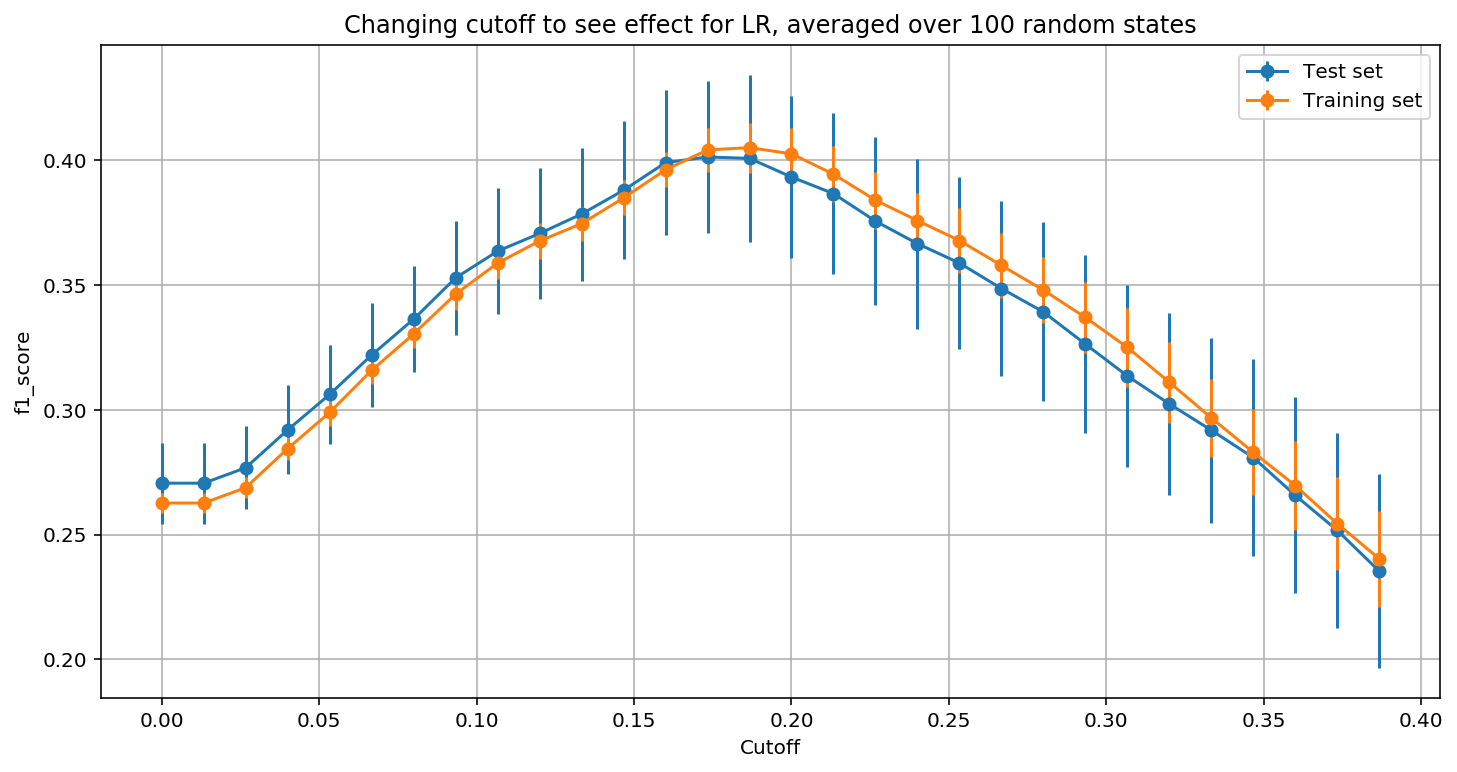

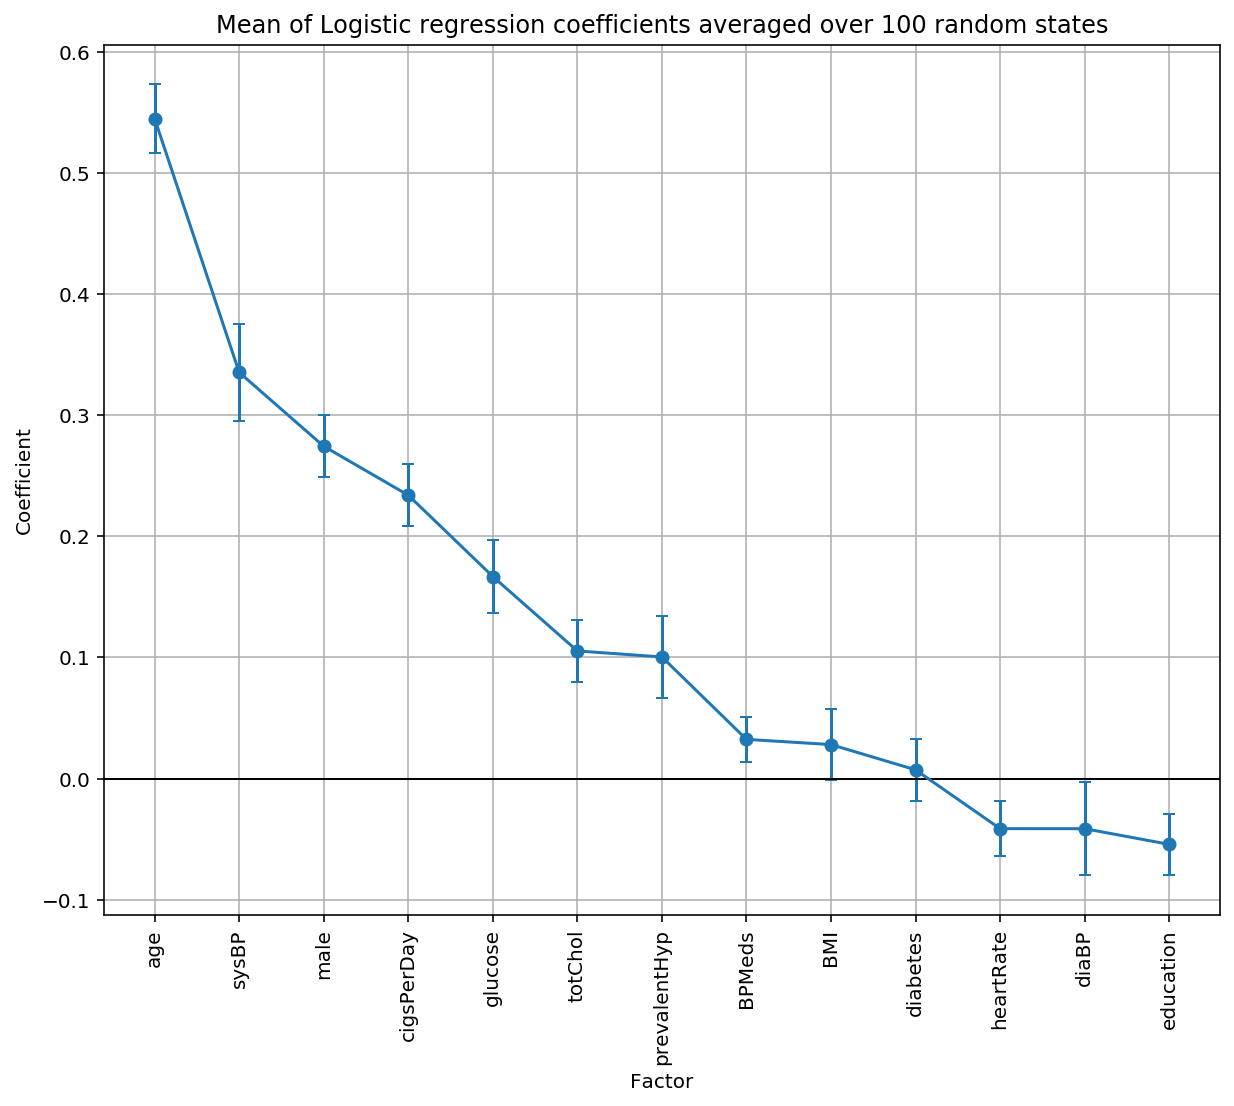

In [346]:
###################################
#### TEST PARAMS
# range_x = np.arange(0.05, 0.5, 0.01) # cutoff range to vary
param = 'f1_score' # test param
n_states = 100 # number of states to average over
algorithm = log_regressor # the function under test
###################################


t_overfit(dataset_c, algorithms["Logistic Regression"], scale='standard', remove_missing = 'drop',
         resample = 'none',metrics=['f1_score'],x_max=0.4,v=1,op='f1_score',label='LR') 

roc auc for LR: 0.7801407078110191
roc auc for framingham: 0.6877080249204374


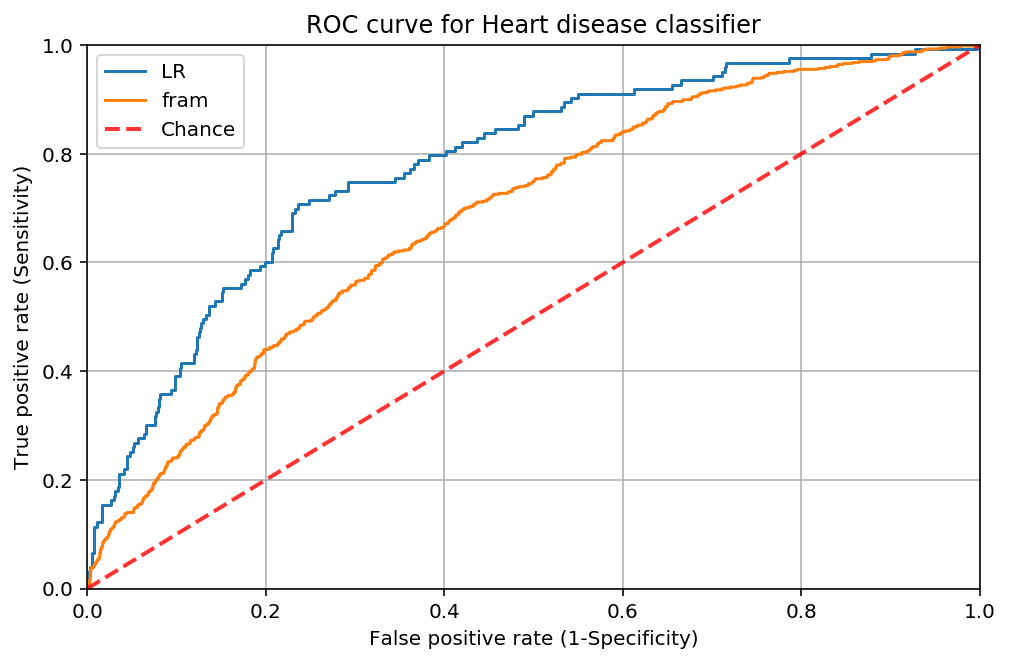

In [350]:
### ROC CURVES

features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate']

dataset_t = pp.chose_features(dataset_c, features=features) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows 
# dataset_t = pp.scale_data(dataset_t)
X_train, X_test, y_train, y_test = pp.split_data(dataset_t,r_state=0) # split dataset


##############################################
from sklearn.metrics import roc_curve,roc_auc_score

LR = log_regressor(X_train, y_train) 
# KN = k_neighbors(X_train, y_train) 
# SVM = support_vector_m(X_train, y_train) 

plt.figure(figsize = (8,5))

y_pred_prob_yes=LR.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr,label ='LR')
print('roc auc for LR:',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

# y_pred_prob_yes=KN.predict_proba(X_test)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
# plt.plot(fpr,tpr,label ='KN')
# print('roc auc for KN:',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

# y_pred_prob_yes=SVM.predict_proba(X_test)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
# plt.plot(fpr,tpr,label ='SVM')
# print('roc auc for SVM:',roc_auc_score(y_test,y_pred_prob_yes[:,1]))

fpr, tpr, thresholds = roc_curve(df_fram.TenYearCHD, df_fram.fram_percent)
plt.plot(fpr,tpr,label ='fram')
print('roc auc for framingham:',roc_auc_score(df_fram.TenYearCHD, df_fram.fram_percent))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.legend()

In [341]:
#################################
# MULTI VAR OPTIMISATION
###################################
#### TEST PARAMS
param = 'f1_score' # test param
n_states = 3 # number of states to average over
algorithm = log_regressor # the function under test

# options over which to test combinations
o_remove_outliers = [True,False]
o_scale = ['none','minmax','standard']
o_remove_missing = ['drop','impute_mean','impute_median']
o_resample = ['none','smote','up','down']

optimal = []
#remove_outliers = False, remove_missing='drop', scale = None, resample = 'none', 
               #n_features=len(dataset.columns)

import itertools
tot = len(o_remove_outliers)*len(o_scale)*len(o_remove_missing)*len(o_resample)
i = 1
for outliers, scale, remove_missing, resample in itertools.product(o_remove_outliers,o_scale, o_remove_missing,o_resample):
    print(round(i/tot*100,2),"%, ",end='')
    i+=1
    mean, std = t_overfit(dataset_c, algorithms["Logistic Regression"], scale=scale, remove_missing = remove_missing,
         resample = resample,metrics=['f1_score'],x_max=0.4,op='f1_score',label='LR') 
    optimal.append([outliers,remove_missing,scale,resample,mean, std])

optimal = pd.DataFrame(optimal,columns=['remove_outliers','remove_missing','scale','resample','test_max_mean','test_max_std'])
optimal

1.39 %, 2.78 %, 4.17 %, 5.56 %, 6.94 %, 8.33 %, 9.72 %, 11.11 %, 12.5 %, 13.89 %, 15.28 %, 16.67 %, 18.06 %, 19.44 %, 20.83 %, 22.22 %, 23.61 %, 25.0 %, 26.39 %, 27.78 %, 29.17 %, 30.56 %, 31.94 %, 33.33 %, 34.72 %, 36.11 %, 37.5 %, 38.89 %, 40.28 %, 41.67 %, 43.06 %, 44.44 %, 45.83 %, 47.22 %, 48.61 %, 50.0 %, 51.39 %, 52.78 %, 54.17 %, 55.56 %, 56.94 %, 58.33 %, 59.72 %, 61.11 %, 62.5 %, 63.89 %, 65.28 %, 66.67 %, 68.06 %, 69.44 %, 70.83 %, 72.22 %, 73.61 %, 75.0 %, 76.39 %, 77.78 %, 79.17 %, 80.56 %, 81.94 %, 83.33 %, 84.72 %, 86.11 %, 87.5 %, 88.89 %, 90.28 %, 91.67 %, 93.06 %, 94.44 %, 95.83 %, 97.22 %, 98.61 %, 100.0 %, 

,remove_outliers,remove_missing,scale,resample,test_max_mean,test_max_std
0,True,drop,none,none,0.435700,0.173333
1,True,drop,none,smote,0.347421,0.386667
2,True,drop,none,up,0.422195,0.386667
3,True,drop,none,down,0.420720,0.373333
4,True,impute_mean,none,none,0.402218,0.186667
...,...,...,...,...,...,...
67,False,impute_mean,standard,down,0.378773,0.386667
68,False,impute_median,standard,none,0.398443,0.186667
69,False,impute_median,standard,smote,0.354404,0.386667
70,False,impute_median,standard,up,0.387944,0.386667


In [343]:
optimal_max = optimal.iloc[optimal['test_max_mean'].idxmax()]
optimal_max


remove_outliers        True
remove_missing         drop
scale                  none
resample               none
test_max_mean        0.4357
test_max_std       0.173333
Name: 0, dtype: object

Now dropping rows with outliers values....
	 * Dropped 17 rows 0.4%. 4223 rows remaining

MAX AV TEST: 0.401
CUTOFF MAX AV TEST: 0.173

MAX AV TRAIN: 0.403
CUTOFF MAX AV TRAIN: 0.187


(0.400918190655283, 0.17333333333333334)

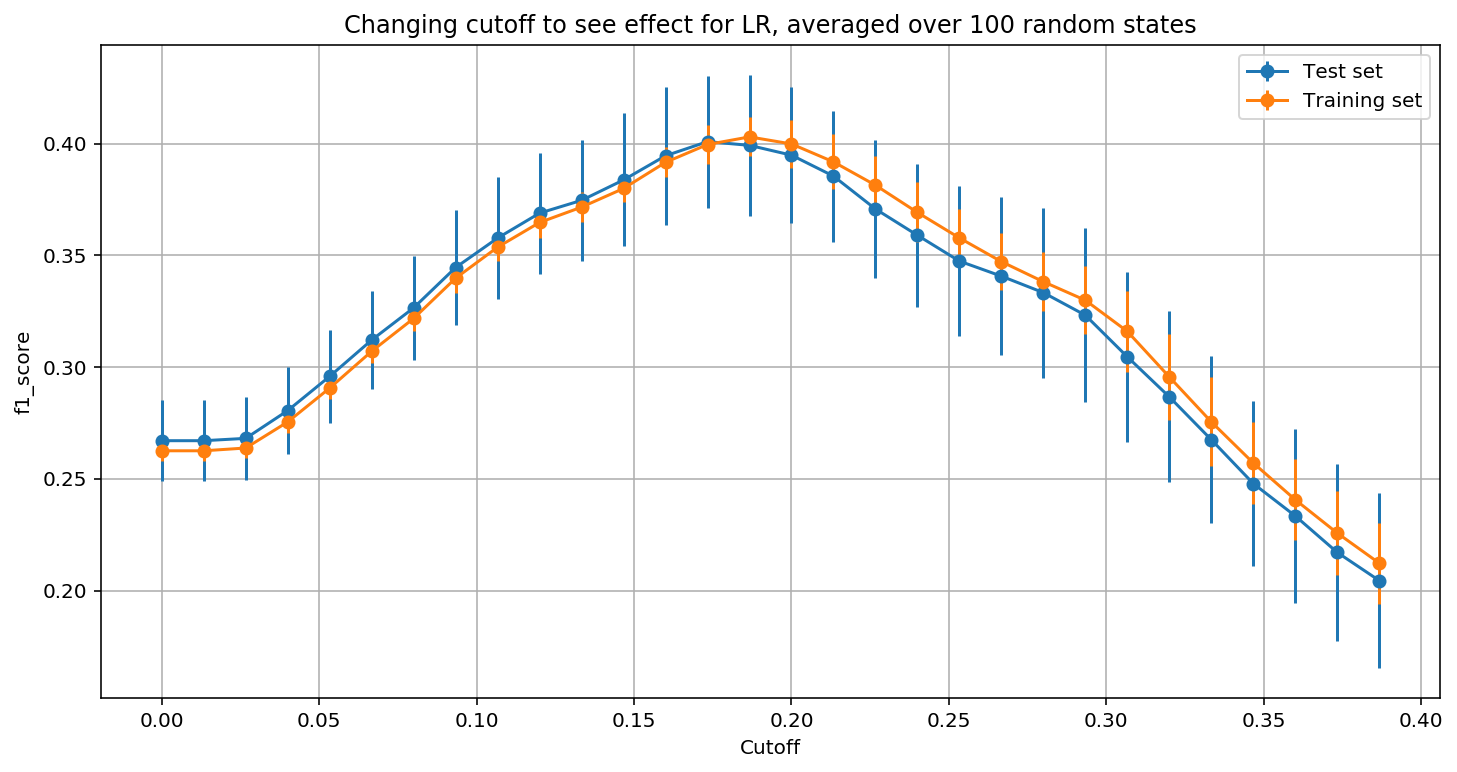

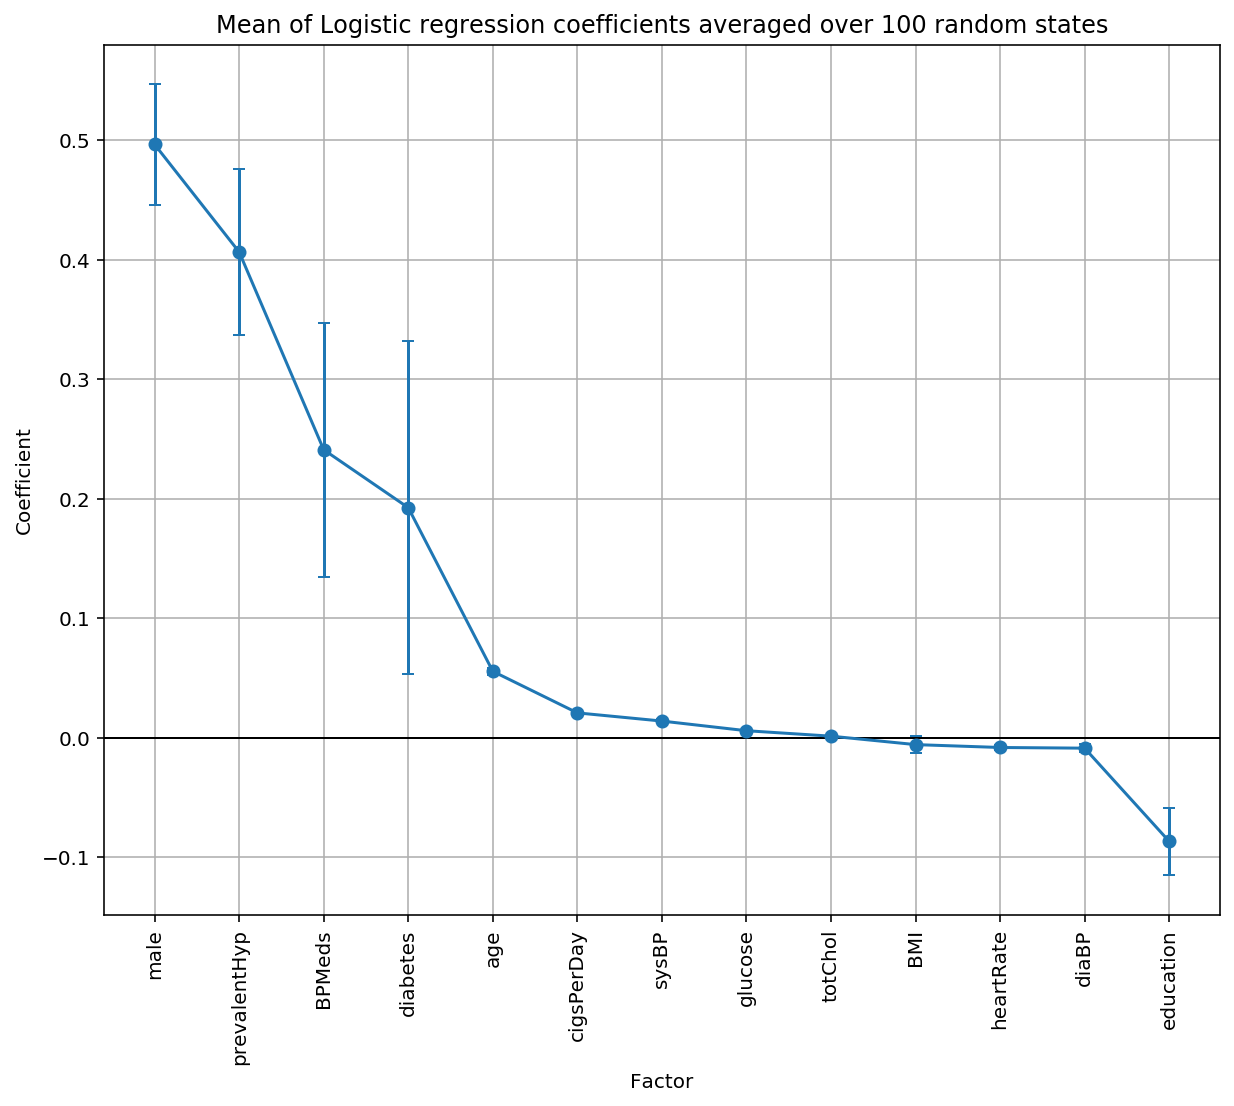

In [344]:
t_overfit(dataset_c, algorithms["Logistic Regression"], 
          remove_outliers=optimal_max['remove_outliers'],
          scale=optimal_max['scale'], 
          remove_missing = optimal_max['remove_missing'],
          resample = optimal_max['resample'],
          metrics=['f1_score'],x_max=0.4,v=1,op='f1_score',label='LR')

In [294]:
### Investigating resampling - I had an idea that we may not have to exactly balance the ratio of CHD 1 and 0 such 
### that it is 1's:0's = 1. It may be adequate to just slightly increase the ratio of 1's:0's from 0.2 to something a bit
### greater without fully balancing. The following code plots the curves....


def t_resampling(dataset,f_algorithm,cutoff=0.5,metric='Accuracy'):
    '''Investigate the effects of resampling and make plots
    - dataset: DataFrame. The dataset to analyse.
    - f_algorithm: function pointer. A function that fits X_train and y_train
    - *cutoff: float in range(0,1). Cutoff by which a positive/negative result is predicted.
    - *metric: string 'Accuracy','Precision','Recall','f1_score'. Score which to return
    '''
    features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
                'diabetes', 'BPMeds', 'male', 'BMI',
                'education', 'heartRate','prevalentStroke'] 

    results = []

    dataset_t = pp.chose_features(dataset, features=features) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    dataset_t = pp.scale_data(dataset_t) # scale

    #with resampling
    train, test = pp.split_data(dataset_t,split_dep_var=False) # split into train and test
    X_test, y_test = pp.split_dep_var(test) # Don't mess with the test set!

    range_r = np.arange(0.2, 1.01, 0.05) # range of rations 1:0 

    for ratio in range_r: #
        X_train_up, y_train_up = pp.split_dep_var(pp.upsample(train,ratio_1_to_0=ratio))
        X_train_down, y_train_down = pp.split_dep_var(pp.downsample(train,ratio_1_to_0=ratio))
        X_train_none, y_train_none = pp.split_dep_var(train)

        LR = f_algorithm(X_train_up, y_train_up)
        results_up = performance(LR,X_test,y_test,output= metric,cutoff=cutoff)

        LR = f_algorithm(X_train_down, y_train_down)
        results_down = performance(LR,X_test,y_test,output= metric,cutoff=cutoff)

        LR = f_algorithm(X_train_none, y_train_none)
        results_none = performance(LR,X_test,y_test,output= metric,cutoff=cutoff)


        results.append([results_up,results_down,results_none])

    results = pd.DataFrame(results,columns=['Upsampled','Downsample','Unbalanced'])


    for method in results.columns:
        plt.plot(range_r, results[method],label='{} cutoff: {}'.format(method,cutoff),marker='o')

    plt.grid()
    plt.title('Changing ratio_1_to_0 to see effect on \n{} for resampling methods for {}'.format(metric,str(algorithm)))
    plt.xlabel('ratio_1_to_0')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1, 0.9))



Upsampled max=0.8443
Downsample max=0.8415
Unbalanced max=0.8415
Upsampled max=0.4734
Downsample max=0.4581
Unbalanced max=0.1714


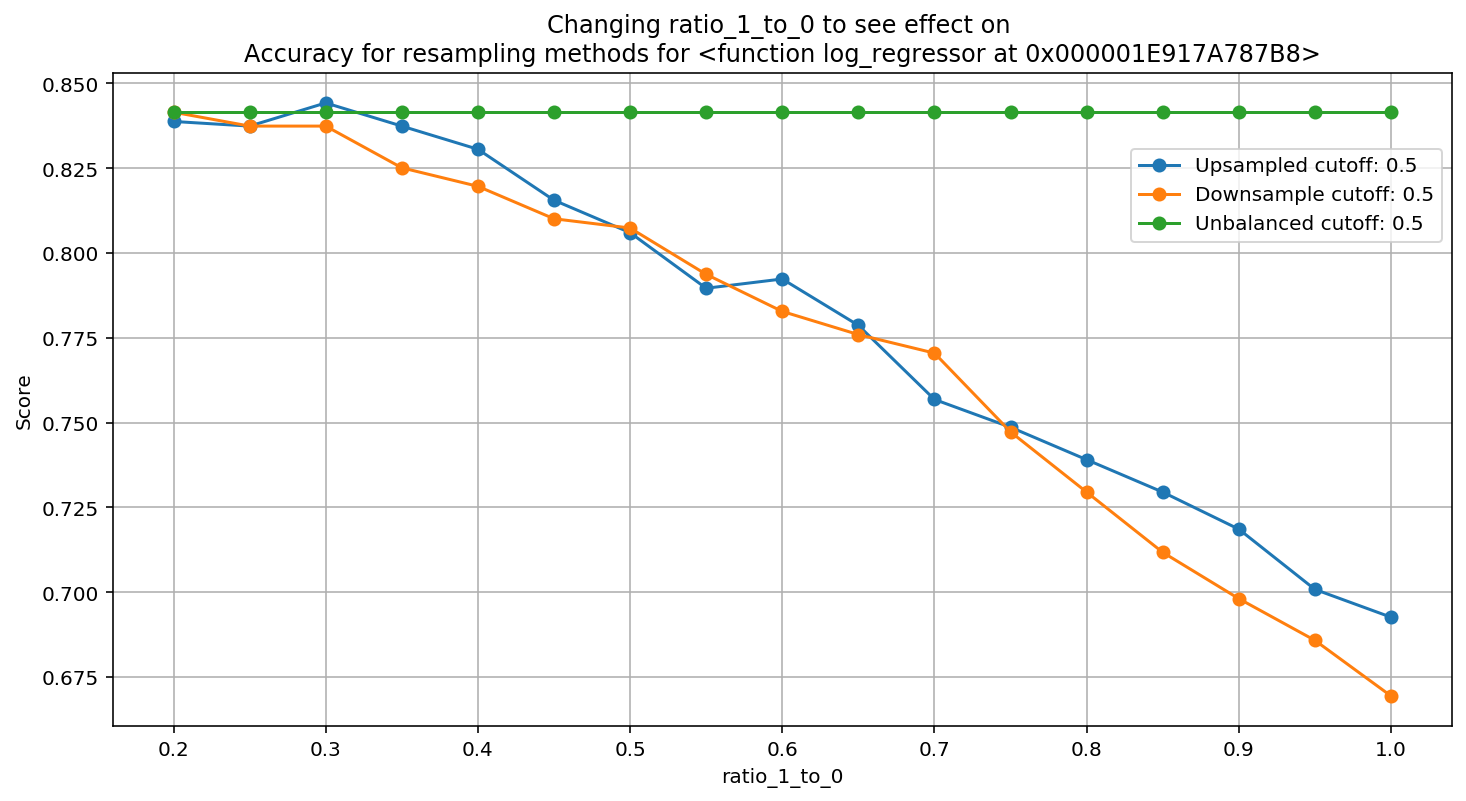

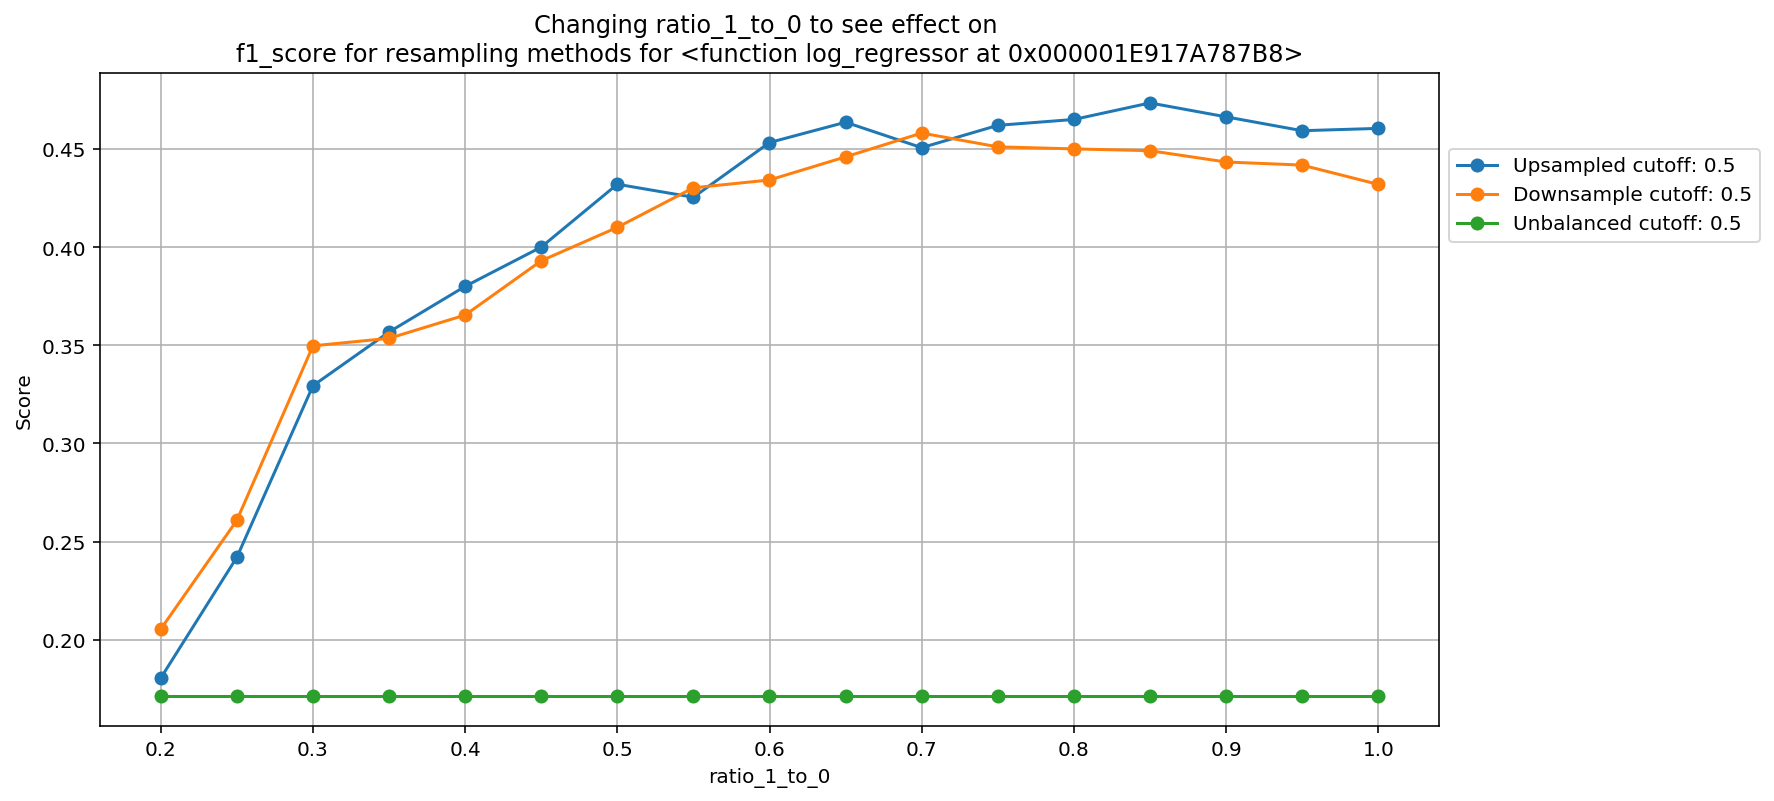

In [297]:
### Running the test function for resampling with LR

plt.figure(figsize=(12, 6))
t_resampling(dataset_c,f_algorithm=log_regressor,metric='Accuracy')

plt.figure(figsize=(12, 6))
t_resampling(dataset_c,f_algorithm=log_regressor,metric='f1_score')


Upsampled max=0.8443
Downsample max=0.8415
Unbalanced max=0.8415
Upsampled max=0.8347
Downsample max=0.8388
Unbalanced max=0.8347
Upsampled max=0.8197
Downsample max=0.8128
Unbalanced max=0.8183
Upsampled max=0.8443
Downsample max=0.8415
Unbalanced max=0.8415
Upsampled max=0.8347
Downsample max=0.8388
Unbalanced max=0.8347
Upsampled max=0.8197
Downsample max=0.8128
Unbalanced max=0.8183
Upsampled max=0.7805
Downsample max=0.7480
Unbalanced max=0.0976
Upsampled max=0.8780
Downsample max=0.8699
Unbalanced max=0.1626
Upsampled max=0.9431
Downsample max=0.9593
Unbalanced max=0.3171


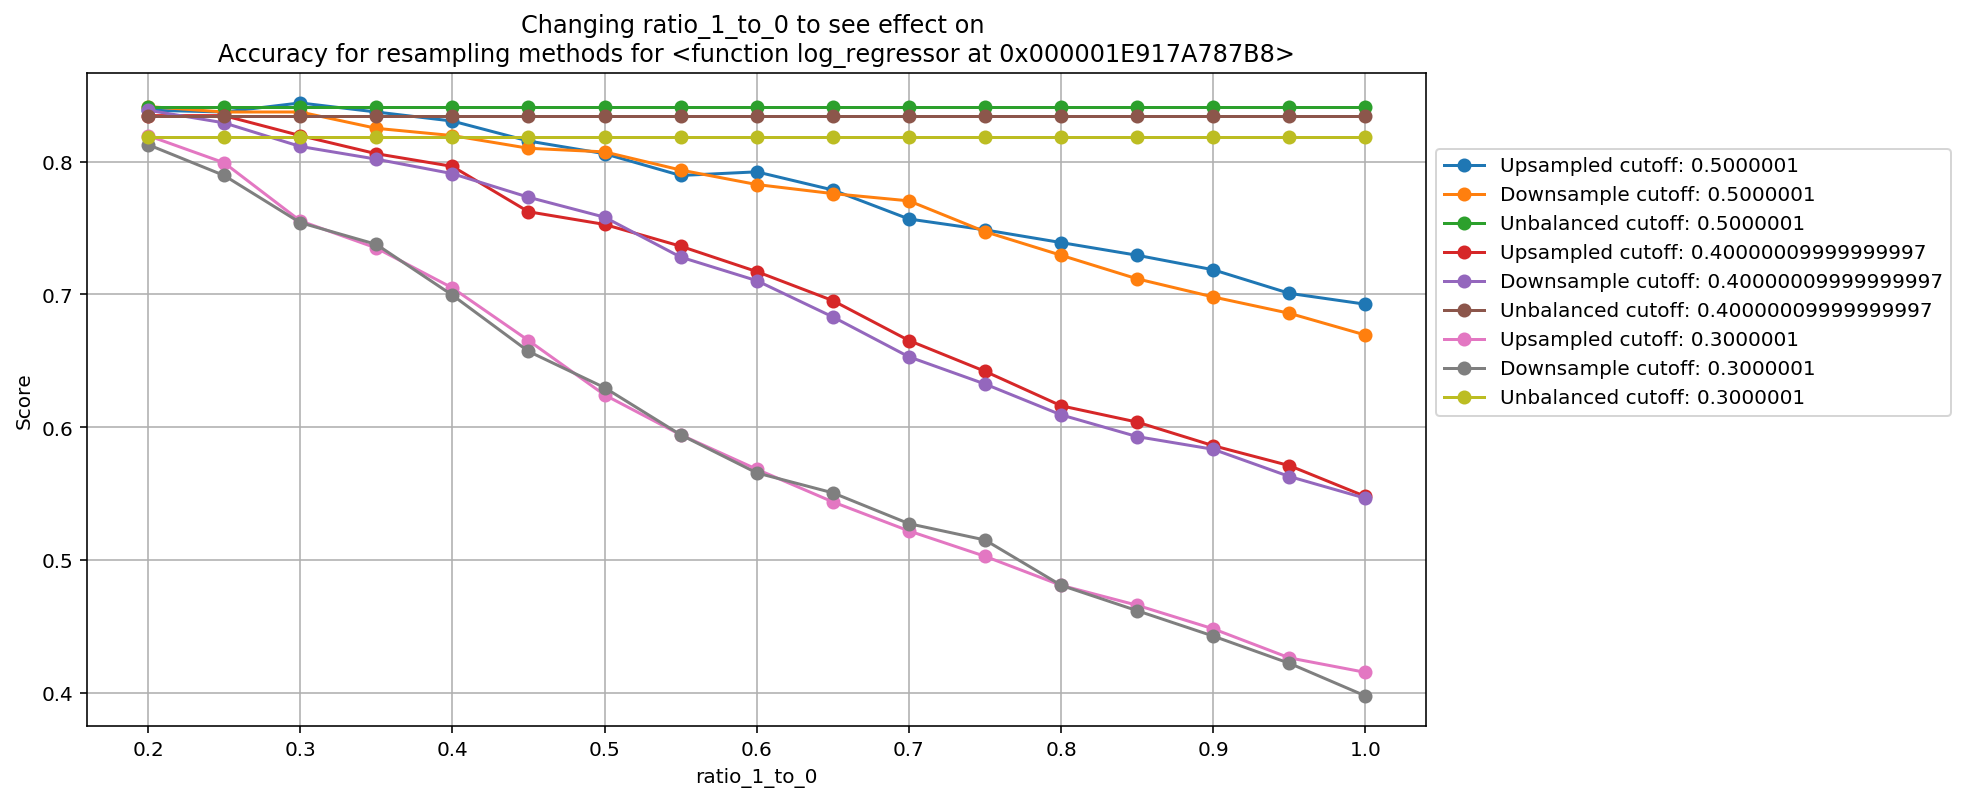

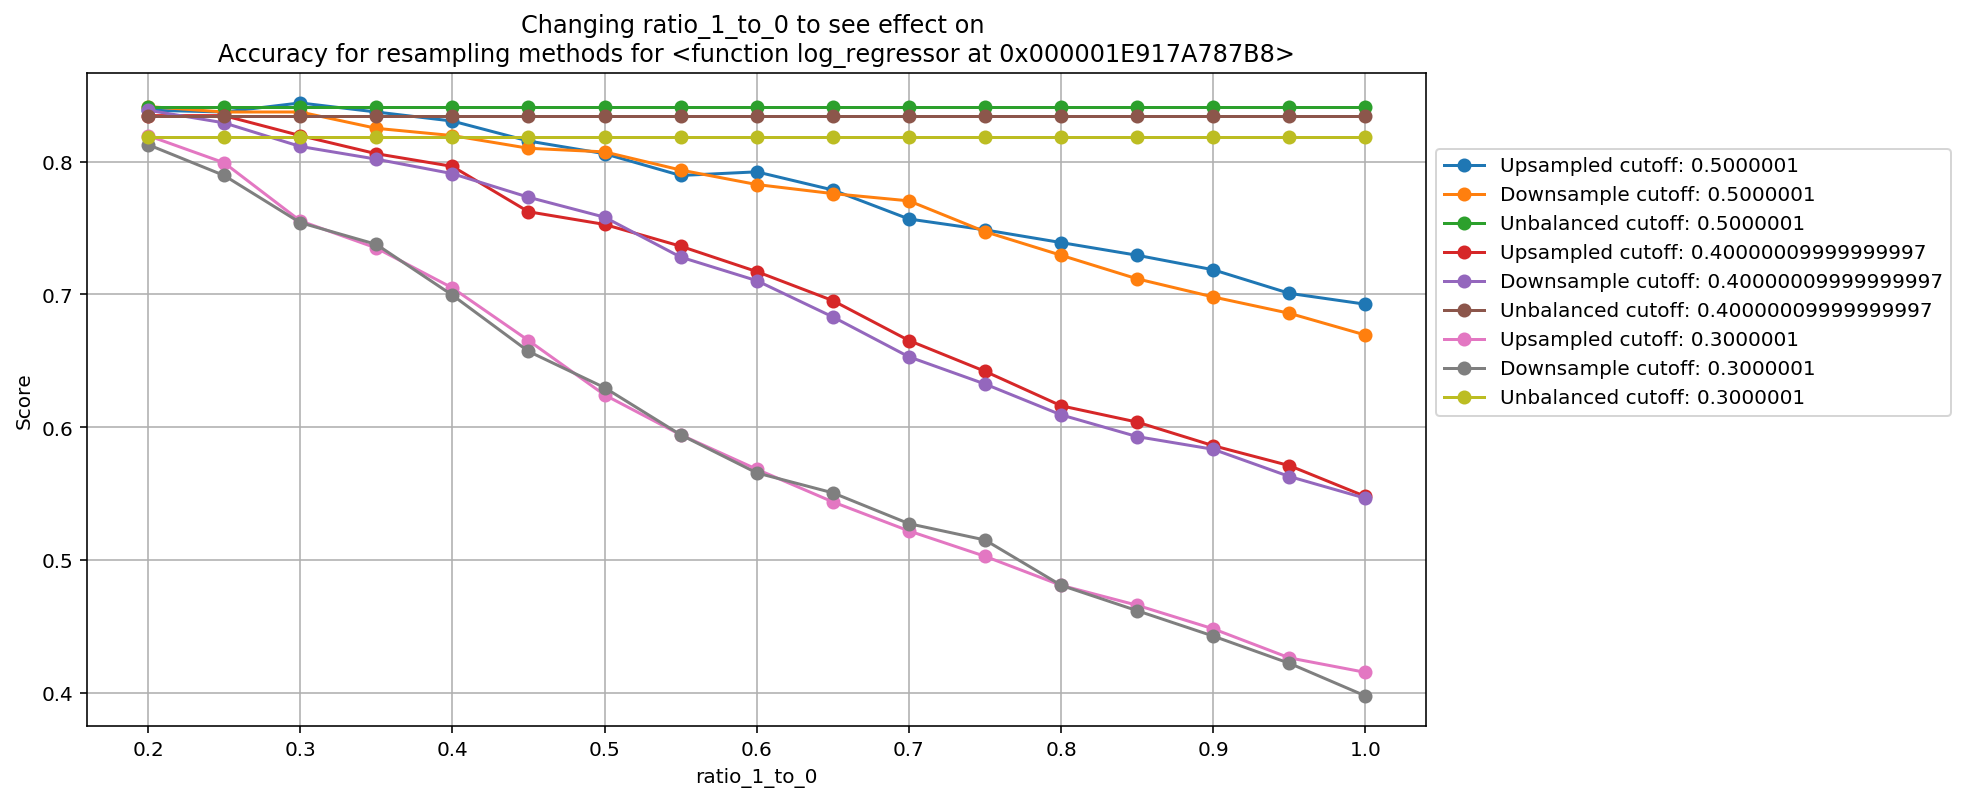

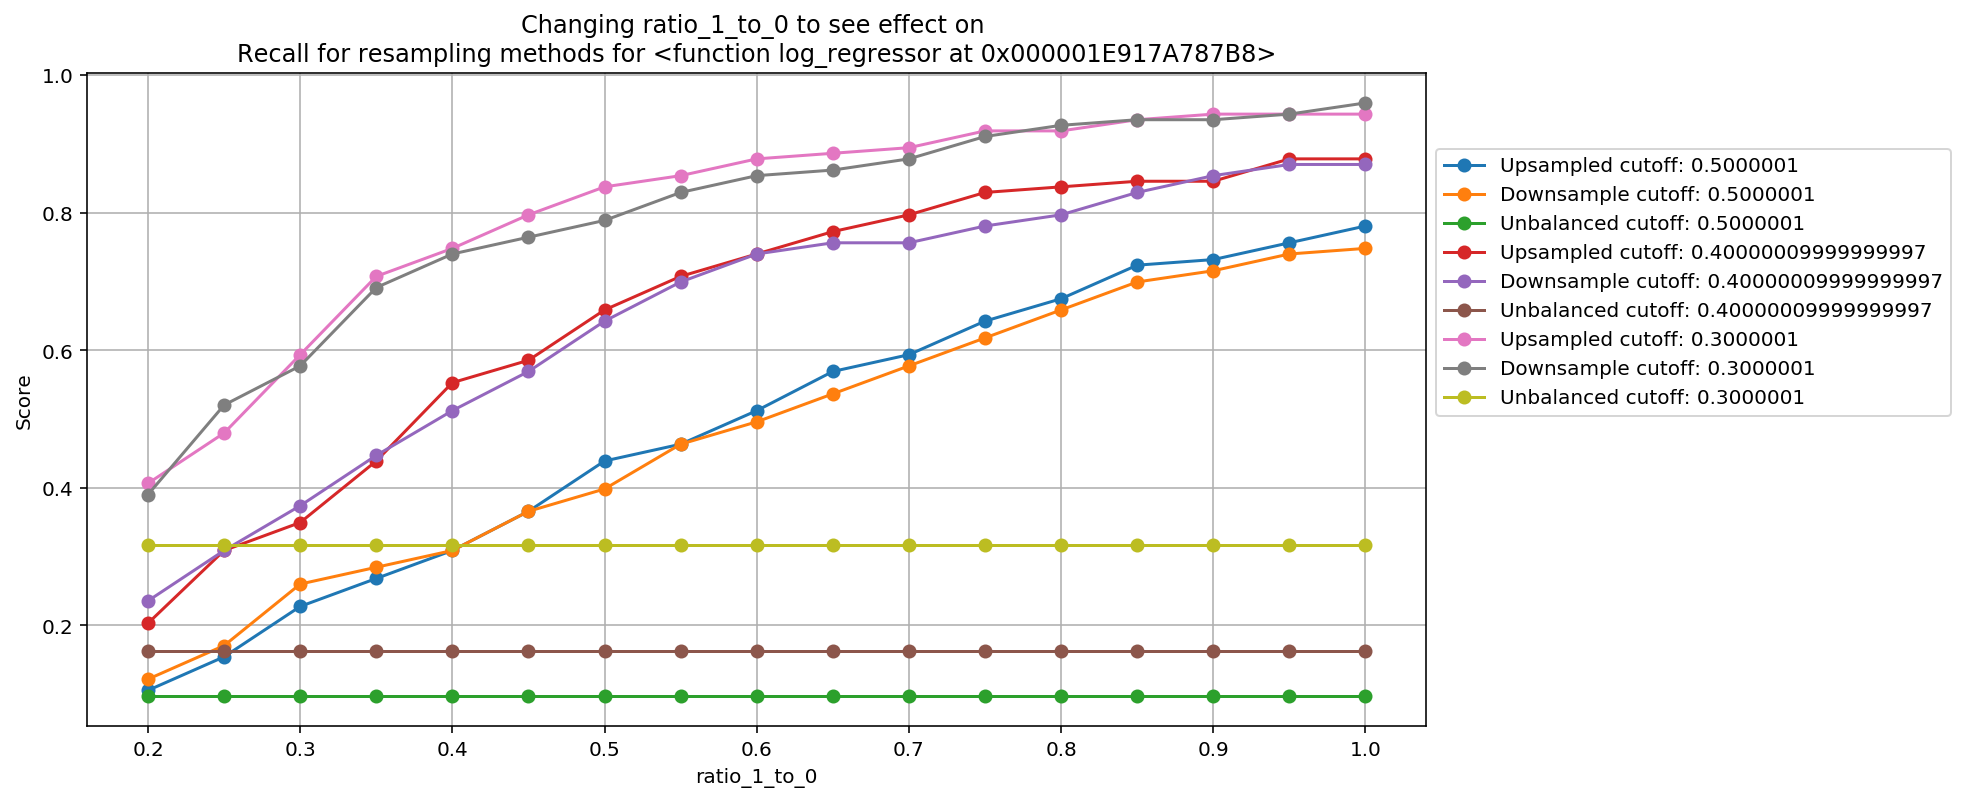

In [301]:
### These graphs are quite confusing but I was interested in the shift when the cutoff was changed

range_cutoff = np.arange(0.5000001, 0.3, -0.1)

plt.figure(figsize=(12, 6))
for cut in range_cutoff:
    t_resampling(dataset_c,f_algorithm=log_regressor,cutoff=cut,metric='Accuracy')

plt.figure(figsize=(12, 6))
for cut in range_cutoff:
    t_resampling(dataset_c,f_algorithm=log_regressor,cutoff=cut,metric='Accuracy')
    
plt.figure(figsize=(12, 6))
for cut in range_cutoff:
    t_resampling(dataset_c,f_algorithm=log_regressor,cutoff=cut,metric='Recall')

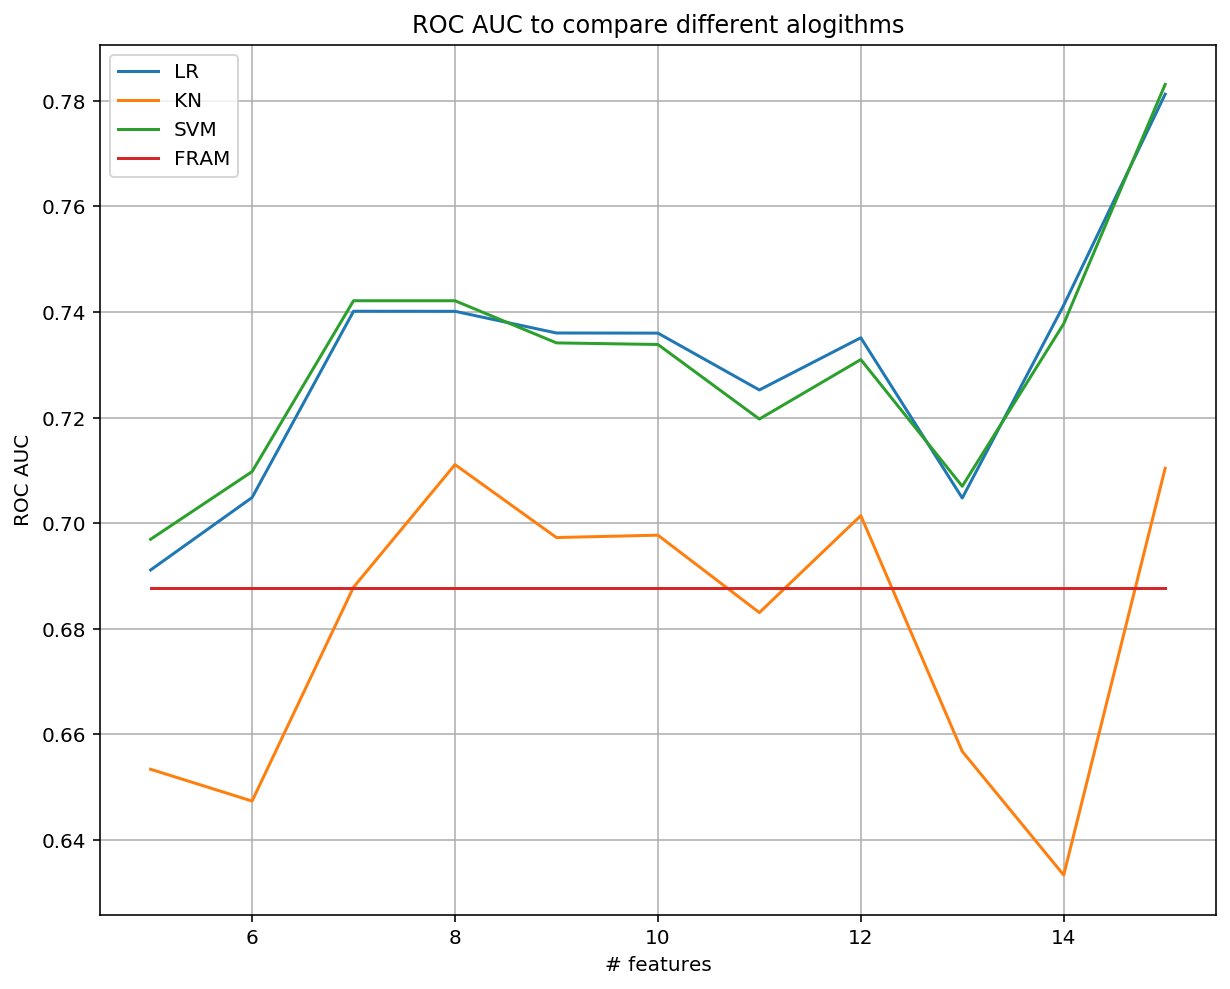

In [314]:
### AUROC for n features
#############################################

roc_auc_df = []
features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate']
import math



for n_features in range(5,len(features)+1):
    dataset_t = pp.chose_features(dataset_c, features=features[:n_features]) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows 
    dataset_t = pp.scale_data(dataset_t)

    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    LR = log_regressor(X_train, y_train)
    KN = k_neighbors(X_train, y_train)
    SVM = support_vector_m(X_train, y_train)
    row = [0,0,0,0]

    y_pred_prob_yes=LR.predict_proba(X_test)
    row[0] = roc_auc_score(y_test,y_pred_prob_yes[:,1])
  
    y_pred_prob_yes=KN.predict_proba(X_test)
    row[1] = roc_auc_score(y_test,y_pred_prob_yes[:,1])
    
    y_pred_prob_yes=SVM.predict_proba(X_test)
    row[2] = roc_auc_score(y_test,y_pred_prob_yes[:,1])
    
    row[3] = roc_auc_score(df_fram.TenYearCHD, df_fram.fram_percent)
    roc_auc_df.append(row)
    
roc_auc_df=pd.DataFrame(roc_auc_df,columns=['LR','KN','SVM','FRAM'])

plt.figure(figsize=(10,8))
for col in roc_auc_df.columns:
    plt.plot(list(range(5,len(features)+1)),roc_auc_df[col],label=col)
plt.grid(True)
plt.title('ROC AUC to compare different alogithms')
plt.xlabel('# features')
plt.ylabel('ROC AUC')

plt.legend()

0.0 %, 6.25 %, 12.5 %, 18.75 %, 25.0 %, 31.25 %, 37.5 %, 43.75 %, 50.0 %, 56.25 %, 62.5 %, 68.75 %, 75.0 %, LR accuracy max=0.8302
KN accuracy max=0.8090
SVM accuracy max=0.8302
FRAM accuracy max=0.8475


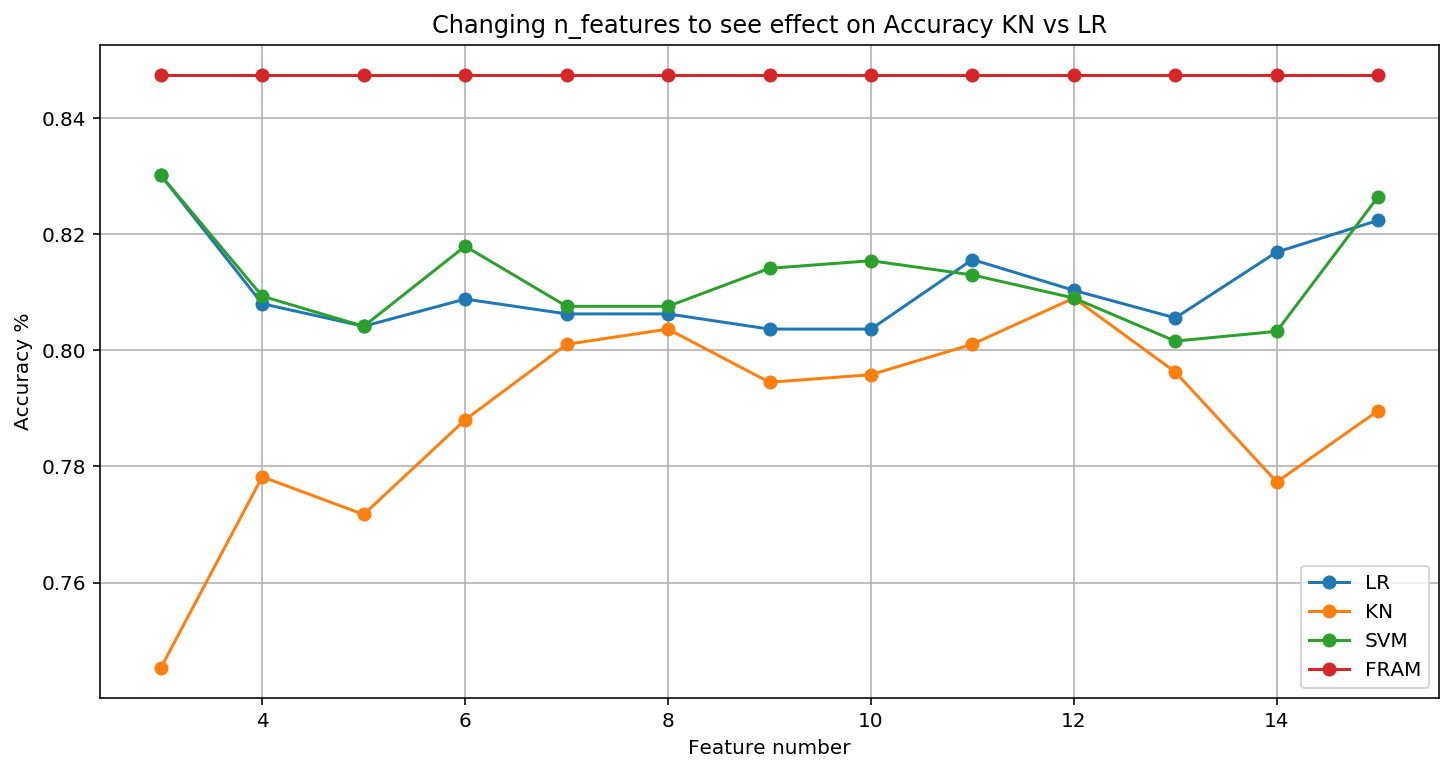

In [302]:
### COMPARE ALGORITHMS AT CONST CUTOFF
###
### - This is MISLEADING as distributions are NOT the same/ symmetric for all algorithms
### - This means that at constant cutoff some algorithms will come out much better. Instead we should OPTIMISE 
###   the cutoff for each algorithm and then plot a similar graph
###


results = []



features = ['TenYearCHD','const','sysBP', 'glucose', 'age', 'totChol', 'cigsPerDay', 'diaBP', 'prevalentHyp',
            'diabetes', 'BPMeds', 'male', 'BMI',
            'education', 'heartRate']

dataset_c = add_constant(dataset)

param = 'Accuracy'
cutoff=0.3

#Investigate effect of no. features
for i in range(3,len(features)+1):
    print((i-3)/(len(features)+1)*100,'%, ',end='')
    dataset_t = pp.chose_features(dataset_c, features=features[:i]) # choose n features

    dataset_t = pp.drop_missing(dataset_t) # drop missing rows



    dataset_t = pp.scale_data(dataset_t)

    
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
   
    LR = log_regressor(X_train,y_train)
    KN = k_neighbors(X_train,y_train)
    SVM = support_vector_m(X_train,y_train)
    
    
    results.append([performance(LR,X_test,y_test,cutoff=cutoff,output= param),
                    performance(KN,X_test,y_test,cutoff=cutoff,output= param),
                    performance(SVM,X_test,y_test,cutoff=cutoff,output= param),
                    performance('fram',df_fram['fram_percent'],df_fram['TenYearCHD'],cutoff=cutoff,output= param)
                   ])
    
    
    

results = pd.DataFrame(results,columns=['LR','KN','SVM','FRAM'])



plt.figure(figsize=(12, 6))
for algor in results.columns:
    plt.plot(range(3,i+1), results[algor], label=algor,marker='o')
    print(algor, "accuracy max={:.4f}".format(max(results[algor])))

plt.grid()
plt.title('Changing n_features to see effect on {} KN vs LR'.format(param))
plt.xlabel('Feature number')
plt.ylabel('{} %'.format(param))
plt.legend()







Calculating linear regressor...

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Confusion Matrix:
[[635   3]
 [ 85  11]]
Accuracy: 88.01%
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       638
           1       0.79      0.11      0.20        96

   micro avg       0.88      0.88      0.88       734
   macro avg       0.83      0.55      0.57       734
weighted avg       0.87      0.88      0.84       734



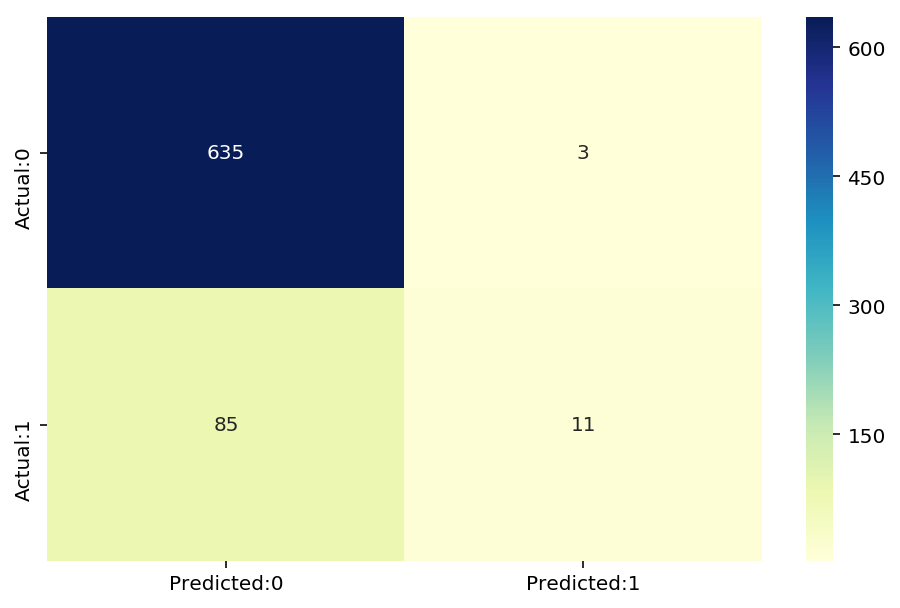

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('\nCalculating linear regressor...\n')
LR = LogisticRegression(random_state=0)
LR = LR.fit(X_train, y_train)
print(LR)

y_pred = LR.predict(X_test)

print('Confusion Matrix:')
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
print(confusion_matrix(y_test,y_pred))

print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

print(classification_report(y_test,y_pred))



In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('True Positives: {}, True Negatives: {}, False Positives (Type 1 error): {}, False Negatives (Type 2 error): {}\n'
     .format(TP,TN,FP,FN))
    
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


#From the above statistics it is clear that the model is highly specific than sensitive. The negative values are predicted more accurately than the positives.


In [ ]:
from statsmodels.tools import add_constant as add_constant
dataset2 = add_constant(dataset)
dataset2.head()
dataset2 = pp.drop_missing(dataset2)

LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train) 
cols=dataset2.columns[:-1]
model=sm.Logit(dataset2.TenYearCHD,dataset2[cols])
result=model.fit()
result.summary()

In [ ]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(dataset2,dataset2.TenYearCHD,cols)
result.summary()

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

In [ ]:
# dataset2=pp.chose_features(dataset,features=['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD'])
# dataset2=pp.drop_missing(dataset2)
# X_train,X_test,y_train,y_test=pp.split_data(dataset2)

# log_regressor(X_train, X_test, y_train, y_test)
import sklearn
new_features=dataset[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
new_features=pp.drop_missing(dataset,v=1)
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]

x_train,x_test,y_train,y_test=pp.split_data(new_features,test_size=.20)

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

sklearn.metrics.accuracy_score(y_test,y_pred)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=LR.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n')
    


The following is implemented above

In [ ]:
count=0
for i in dataset.isnull().sum(axis=1):
    if i>0:
        count=count+1
if count>0:
    print(count, 'Rows(or', round((count/len(dataset.index))*100), '%) with missing values are dropped out of total', str(len(dataset.index)))
    dataset.dropna(axis=0,inplace=True)
    print('Now dataset has', len(dataset.index),' rows')

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

In [ ]:
from sklearn.metrics import accuracy_score as score
print('Accuracy:')
print(score(y_test,y_pred)*100)